# FEATURISATION & MODEL TUNING

### • DOMAIN: Semiconductor manufacturing process
#### • CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.
#### • DATA DESCRIPTION: signal-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features. 
The dataset presented in this case represents a selection of such features where each example represents a single production entity with 
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to 
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
#### • PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.


### Steps and tasks:

#### 1. Import and understand the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### 1.A. Import ‘signal-data.csv’ as DataFrame.

In [2]:
signal_df = pd.read_csv('signal-data.csv')

In [3]:
signal_df.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [4]:
signal_df.shape

(1567, 592)

In [5]:
signal_df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [6]:
signal_df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [7]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [8]:
signal_df.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [9]:
signal_df.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [10]:
signal_df['Pass/Fail'].unique()

array([-1,  1], dtype=int64)

In [11]:
signal_df['Pass/Fail'].isna().sum()

0

#### 1.B. Print 5 point summary and share at least 2 observations.

In [12]:
signal_df.describe().T.style

In [13]:
signal_df.describe().style

In [14]:
signal_df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

#### Observations
<li> The "Time" Column represet the time at which the signal was generated and seems to have very little impact on the model performace, Hence this can be Deleted</li>
<li> The values in 'Pass/Fail' is highly skewed where "Pass" represented by "-1" occupies "93%" and "fail" represented by "1" is around 6.5%  </li>
<li> There are around 591 features which could be redundent and dimesions can be reduced using PCA </li>
<li> We can observe multiple columns with counts less than 1562 which represents missing data in the columns </li>

## 2. Data cleansing:

#### 2.A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature

In [15]:
signal_df.isnull().sum().sum()

41951

In [16]:
signal_df = signal_df.drop('Time', axis=1)
for col in signal_df.columns:
    if signal_df[col].isnull().sum() / len(signal_df) >= 0.2:
        print(col)
        signal_df.drop(col, axis=1, inplace=True)
    else:
        signal_df[col].fillna(signal_df[col].mean(), inplace=True)

72
73
85
109
110
111
112
157
158
220
244
245
246
247
292
293
345
346
358
382
383
384
385
492
516
517
518
519
578
579
580
581


In [17]:
signal_df.isnull().sum().sum()

0

In [18]:
signal_df.shape

(1567, 559)

#### Observations
<li> As we can see after droping the features with 20%+ Null values around 33 features have been dropped.</li>
<li> as mentioned earlier the Time feature which is of object datatype has been dropped</li>

#### 2.B. Identify and drop the features which are having same value for all the rows.

In [19]:
# Here we are using the nunique fucntion to identify the number of unique values in the columns.
#The columns which has only one Unique value is being dropped
nunique = signal_df.nunique()
cols_to_drop = nunique[nunique == 1].index
signal_df.drop(cols_to_drop, axis=1,inplace=True)
print(signal_df.shape)

(1567, 443)


#### 2.C. Drop other features if required using relevant functional knowledge. Clearly justify the same

<li>As mentioned earlier the Time feature which is of object datatype has been dropped since it has very little impact on the model performance </li>

<li> Checking for columns with low variance and dropping the columns with variance less than "<0.1" . </li>

In [20]:
signal_var = signal_df.drop('Pass/Fail', 1).var().round(2)
low_var_features = signal_var[signal_var <= 0.1]
low_var_features


7      0.00
8      0.01
9      0.00
10     0.00
11     0.00
       ... 
583    0.00
584    0.00
586    0.00
587    0.00
588    0.00
Length: 188, dtype: float64

In [21]:
signal_lvr = signal_df.drop(np.unique(low_var_features.index),axis=1)
signal_lvr.shape


(1567, 255)

In [22]:
signal_lvr.head(10)

0        1          2          3       4         6        12  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   
5  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.3967  200.4720   
6  3030.27  2430.12  2230.4222  1463.6606  0.8294  102.3433  202.0901   
7  3058.88  2690.15  2248.9000  1004.4692  0.7884  106.2400  202.4170   
8  2967.68  2600.47  2248.9000  1004.4692  0.7884  106.2400  202.4544   
9  3016.11  2428.37  2248.9000  1004.4692  0.7884  106.2400  202.5999   

        14        15       16  ...       568        569       570     572  \
0   7.9558  414.8710  10.0433  ...  2.452417  21.117674  533.8500    8.95   
1  10.1548  414.7347   9.2599  ...  2.452417  21.117674  535.0164    5.92   
2   9.5157  416.7075   9.3144  ...  0.411900  68.848900  535.0245   11.21   
3   9.6052  422.2894   9.6924  ...  2.729000  25.036300  530.5682    9.33   
4  10.5661  420.5925  10.3387  ...  2.452417  21.117674  532.0155    8.83   
5   8.6617  414.2426   9.2441  ...  1.870000  22.559800  534.2091    8.91   
6   9.0350  415.8852   9.9990  ...  2.452417  21.117674  541.9036    6.48   
7  13.6872  408.4017   9.6836  ...  2.934900  23.605200  493.0054  278.19   
8  12.6837  417.6009   9.7046  ...  2.368200  18.212000  535.1818    7.09   
9  12.4278  413.3677   9.7046  ...  2.654500   5.861700  533.4200    3.54   

       574      576      577      585         589  Pass/Fail  
0   3.0624   1.6765  14.9509   2.3630   99.670066         -1  
1   2.0111   1.1065  10.9003   4.4447  208.204500         -1  
2   4.0923   2.0952   9.2721   3.1745   82.860200          1  
3   2.8971   1.7585   8.5831   2.0544   73.843200         -1  
4   3.1776   1.6597  10.9698  99.3032   73.843200         -1  
5   2.2598   1.6679  13.7755   3.8276   44.007700         -1  
6   2.2019   1.1958   8.3645   2.8515   44.007700         -1  
7  92.5866  56.4274  16.0862   2.1261   95.031000         -1  
8   2.4902   1.3248  14.2892   3.4456  111.652500         -1  
9   1.0395   0.6636   7.4181   3.0687   90.229400         -1  

[10 rows x 255 columns]

#### Observations
<li> We have dropped around 188 features having variance less than "0.1" which will help in avoiding overfitting of the model</li>

#### 2.D. Check for multi-collinearity in the data and take necessary action

<Axes: >

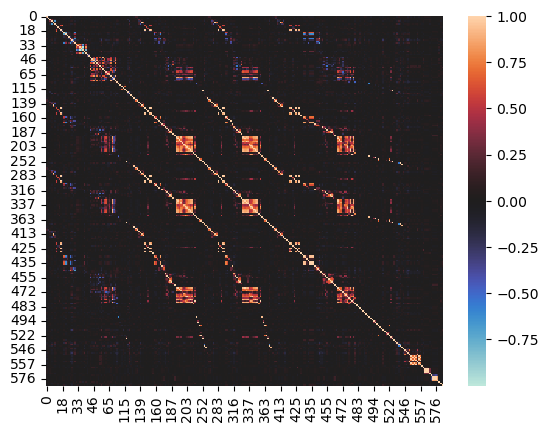

In [23]:
sns.heatmap(signal_lvr.corr(), center=0)

In [24]:
corel_mat=signal_lvr.corr()
corel_mat.head(10)

0         1         2         3         4         6        12  \
0   1.000000 -0.143840  0.004756 -0.007613 -0.011014  0.002270  0.010368   
1  -0.143840  1.000000  0.005767 -0.007568 -0.001636 -0.025564  0.034062   
2   0.004756  0.005767  1.000000  0.298935  0.095891 -0.136225  0.018326   
3  -0.007613 -0.007568  0.298935  1.000000 -0.058483 -0.685835 -0.028223   
4  -0.011014 -0.001636  0.095891 -0.058483  1.000000 -0.074368 -0.002707   
6   0.002270 -0.025564 -0.136225 -0.685835 -0.074368  1.000000  0.058982   
12  0.010368  0.034062  0.018326 -0.028223 -0.002707  0.058982  1.000000   
14 -0.007058 -0.037667  0.006476 -0.019827 -0.017523  0.055333 -0.012805   
15  0.030675 -0.087315  0.006115 -0.013157  0.011435  0.039815 -0.033933   
16 -0.005749 -0.001878 -0.000788 -0.004596 -0.001763  0.040015  0.552542   

          14        15        16  ...       568       569       570       572  \
0  -0.007058  0.030675 -0.005749  ...  0.060010  0.049862 -0.018953  0.013678   
1  -0.037667 -0.087315 -0.001878  ... -0.017051 -0.025490 -0.009000  0.001753   
2   0.006476  0.006115 -0.000788  ...  0.050434  0.064282 -0.037070 -0.000518   
3  -0.019827 -0.013157 -0.004596  ...  0.008646  0.046434  0.002231  0.007634   
4  -0.017523  0.011435 -0.001763  ... -0.012944  0.027696  0.005273 -0.012024   
6   0.055333  0.039815  0.040015  ...  0.016000 -0.070722  0.017264  0.009292   
12 -0.012805 -0.033933  0.552542  ...  0.003572 -0.007246 -0.000639  0.036757   
14  1.000000  0.133463 -0.015420  ... -0.008181  0.002705  0.020110 -0.000807   
15  0.133463  1.000000 -0.020408  ...  0.014993  0.000864  0.011928 -0.024789   
16 -0.015420 -0.020408  1.000000  ... -0.007759 -0.009876  0.007679 -0.014068   

         574       576       577       585       589  Pass/Fail  
0   0.015206  0.013228  0.008601  0.023589  0.004174  -0.025141  
1   0.001303  0.002570 -0.010145  0.002273  0.044797  -0.002603  
2   0.001342  0.002592 -0.028705  0.015752 -0.032890  -0.000957  
3   0.006822  0.008216  0.016438  0.026019 -0.080341  -0.024623  
4  -0.012264 -0.012163 -0.004070 -0.001616  0.050910  -0.013756  
6   0.007783  0.007409 -0.012342 -0.039517  0.043777   0.016239  
12  0.032908  0.035743  0.031434  0.000523 -0.036720  -0.005969  
14  0.000409 -0.000985  0.009505  0.002535  0.068161  -0.068975  
15 -0.024032 -0.023509 -0.019152  0.017745  0.009764  -0.002884  
16 -0.014005 -0.014167 -0.004396  0.002643 -0.013918   0.002356  

[10 rows x 255 columns]

In [25]:
upper = corel_mat.where(np.triu(np.ones(corel_mat.shape), k=1).astype(np.bool))
upper.head(10)

0        1         2         3         4         6        12        14  \
0  NaN -0.14384  0.004756 -0.007613 -0.011014  0.002270  0.010368 -0.007058   
1  NaN      NaN  0.005767 -0.007568 -0.001636 -0.025564  0.034062 -0.037667   
2  NaN      NaN       NaN  0.298935  0.095891 -0.136225  0.018326  0.006476   
3  NaN      NaN       NaN       NaN -0.058483 -0.685835 -0.028223 -0.019827   
4  NaN      NaN       NaN       NaN       NaN -0.074368 -0.002707 -0.017523   
6  NaN      NaN       NaN       NaN       NaN       NaN  0.058982  0.055333   
12 NaN      NaN       NaN       NaN       NaN       NaN       NaN -0.012805   
14 NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15 NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
16 NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          15        16  ...       568       569       570       572       574  \
0   0.030675 -0.005749  ...  0.060010  0.049862 -0.018953  0.013678  0.015206   
1  -0.087315 -0.001878  ... -0.017051 -0.025490 -0.009000  0.001753  0.001303   
2   0.006115 -0.000788  ...  0.050434  0.064282 -0.037070 -0.000518  0.001342   
3  -0.013157 -0.004596  ...  0.008646  0.046434  0.002231  0.007634  0.006822   
4   0.011435 -0.001763  ... -0.012944  0.027696  0.005273 -0.012024 -0.012264   
6   0.039815  0.040015  ...  0.016000 -0.070722  0.017264  0.009292  0.007783   
12 -0.033933  0.552542  ...  0.003572 -0.007246 -0.000639  0.036757  0.032908   
14  0.133463 -0.015420  ... -0.008181  0.002705  0.020110 -0.000807  0.000409   
15       NaN -0.020408  ...  0.014993  0.000864  0.011928 -0.024789 -0.024032   
16       NaN       NaN  ... -0.007759 -0.009876  0.007679 -0.014068 -0.014005   

         576       577       585       589  Pass/Fail  
0   0.013228  0.008601  0.023589  0.004174  -0.025141  
1   0.002570 -0.010145  0.002273  0.044797  -0.002603  
2   0.002592 -0.028705  0.015752 -0.032890  -0.000957  
3   0.008216  0.016438  0.026019 -0.080341  -0.024623  
4  -0.012163 -0.004070 -0.001616  0.050910  -0.013756  
6   0.007409 -0.012342 -0.039517  0.043777   0.016239  
12  0.035743  0.031434  0.000523 -0.036720  -0.005969  
14 -0.000985  0.009505  0.002535  0.068161  -0.068975  
15 -0.023509 -0.019152  0.017745  0.009764  -0.002884  
16 -0.014167 -0.004396  0.002643 -0.013918   0.002356  

[10 rows x 255 columns]

In [26]:
hi_col=[column for column in upper.columns if any(upper[column] >.9)]
print("Columns having corelation greater than .9 which is industry standard",len(hi_col))

Columns having corelation greater than .9 which is industry standard 95


In [27]:
signal_new = signal_lvr.drop(columns = hi_col)
signal_new.shape


(1567, 160)

In [28]:
signal_new.head(10)

0        1          2          3       4         6        12  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   
5  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.3967  200.4720   
6  3030.27  2430.12  2230.4222  1463.6606  0.8294  102.3433  202.0901   
7  3058.88  2690.15  2248.9000  1004.4692  0.7884  106.2400  202.4170   
8  2967.68  2600.47  2248.9000  1004.4692  0.7884  106.2400  202.4544   
9  3016.11  2428.37  2248.9000  1004.4692  0.7884  106.2400  202.5999   

        14        15       16  ...      561         562       564        569  \
0   7.9558  414.8710  10.0433  ...  42.3877  262.729683  6.444985  21.117674   
1  10.1548  414.7347   9.2599  ...  18.1087  262.729683  6.444985  21.117674   
2   9.5157  416.7075   9.3144  ...  24.7524  267.064000  1.100000  68.848900   
3   9.6052  422.2894   9.6924  ...  62.7572  268.228000  7.320000  25.036300   
4  10.5661  420.5925  10.3387  ...  22.0500  262.729683  6.444985  21.117674   
5   8.6617  414.2426   9.2441  ...  30.6277  254.006000  4.750000  22.559800   
6   9.0350  415.8852   9.9990  ...  51.4535  262.729683  6.444985  21.117674   
7  13.6872  408.4017   9.6836  ...  43.0771  265.090000  7.780000  23.605200   
8  12.6837  417.6009   9.7046  ...  13.9158  265.184000  6.280000  18.212000   
9  12.4278  413.3677   9.7046  ...  20.9776  265.206000  7.040000   5.861700   

        570     572      577      585         589  Pass/Fail  
0  533.8500    8.95  14.9509   2.3630   99.670066         -1  
1  535.0164    5.92  10.9003   4.4447  208.204500         -1  
2  535.0245   11.21   9.2721   3.1745   82.860200          1  
3  530.5682    9.33   8.5831   2.0544   73.843200         -1  
4  532.0155    8.83  10.9698  99.3032   73.843200         -1  
5  534.2091    8.91  13.7755   3.8276   44.007700         -1  
6  541.9036    6.48   8.3645   2.8515   44.007700         -1  
7  493.0054  278.19  16.0862   2.1261   95.031000         -1  
8  535.1818    7.09  14.2892   3.4456  111.652500         -1  
9  533.4200    3.54   7.4181   3.0687   90.229400         -1  

[10 rows x 160 columns]

#### Observations
<li> We have dropped around 95 features having corelation greater than .9 which is industry standard</li>
<li> Currently we have 160 features out of 592 features</li>

#### 2.E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions

<li> We can check for the Columns having highly skewed data which will have minimum impact on the model prediction</li>

In [29]:
#finding unique values in each columns
df = signal_new.drop('Pass/Fail', 1).nunique()
#finding columns having less than 10 unique values

Drop = df[df <= 10]
print("Features having less than 10 unique values \n", Drop)


Features having less than 10 unique values 
 209    3
521    9
dtype: int64


In [30]:
signal_new=signal_new.drop(np.unique(Drop.index),axis=1)

In [31]:
signal_new.shape

(1567, 158)

## 3. Data analysis & visualisation

##### 3.A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

##### Univariate analysis of all the predictors feature

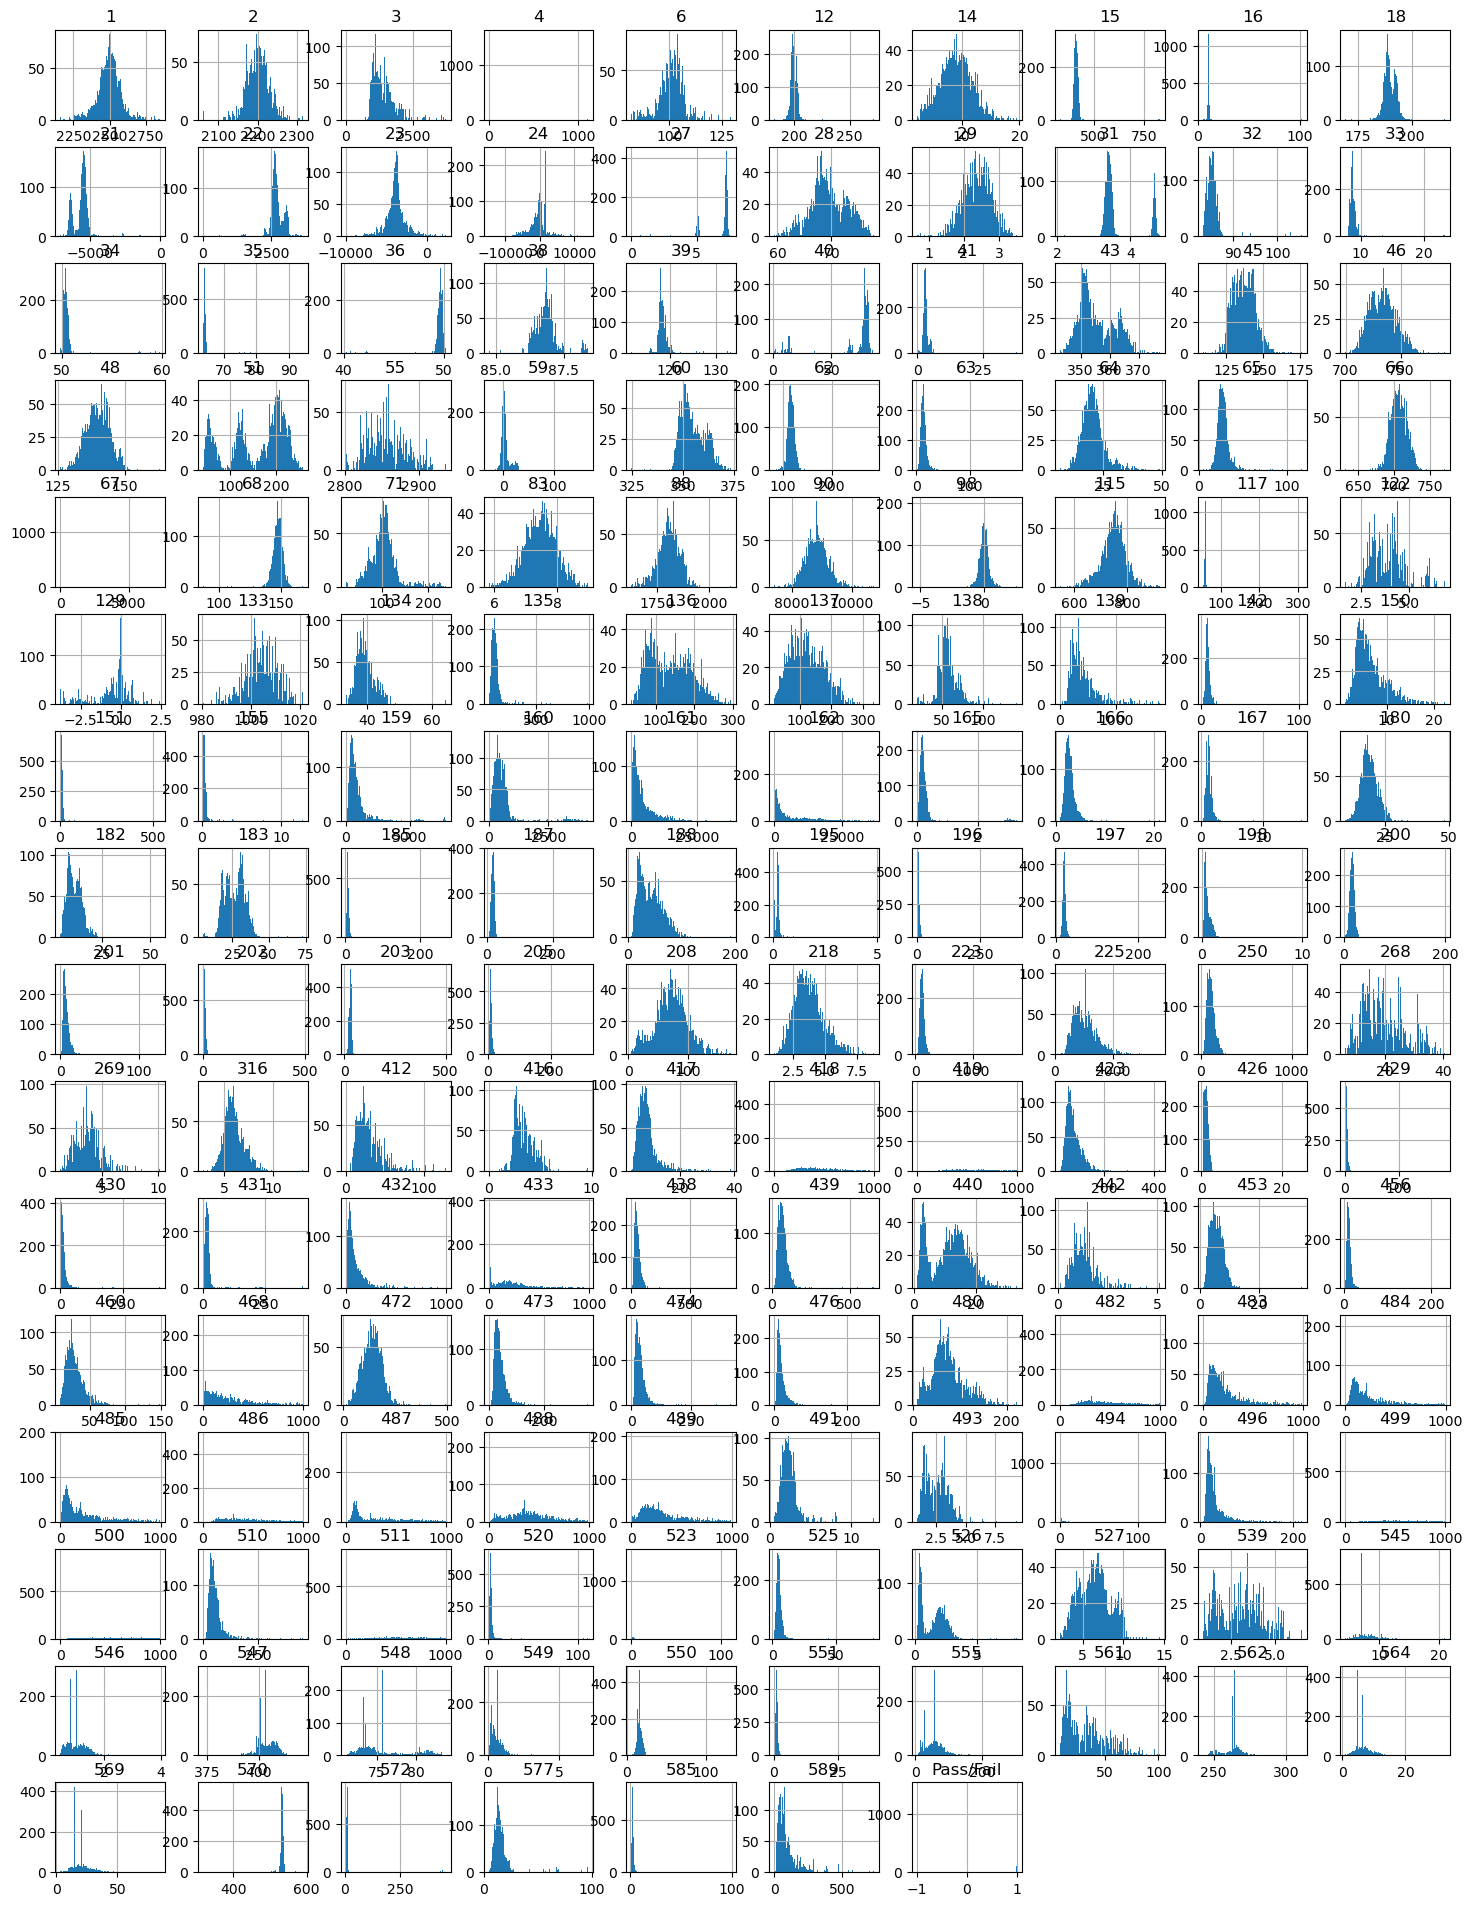

In [32]:
columns = list(signal_new.iloc[:,1:158]) 
signal_new[columns].hist(stacked=True, bins=100, figsize=(18,30), layout=(20,10)); 

##### Univariate analysis of all the Target Variable

<Axes: xlabel='Pass/Fail', ylabel='count'>

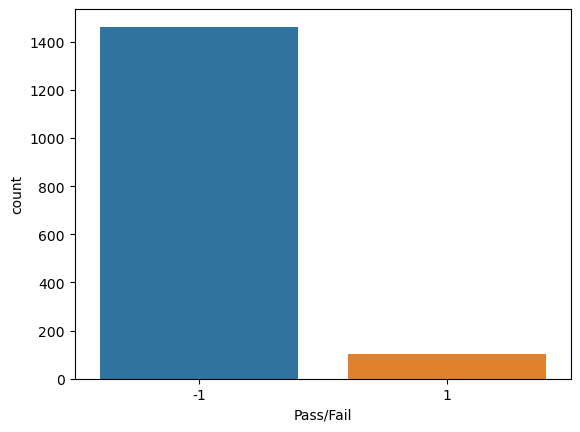

In [33]:
sns.countplot(data= signal_new, x= signal_new['Pass/Fail'])

In [34]:
signal_new['Pass/Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

#### Observations
**Univariate analysis of all the predictors features:**
   <li> We can observe that the data in many features are either positively or negetively Skewed which can be treated using PCA </li>
   
**Univariate analysis of all the Target features:**   
<li> Target feature is highly imbalanced where "-1" representing "Pass" having 93.3% and "Fail" having 6.6%</li>

#### Outlier analysis using boxplot

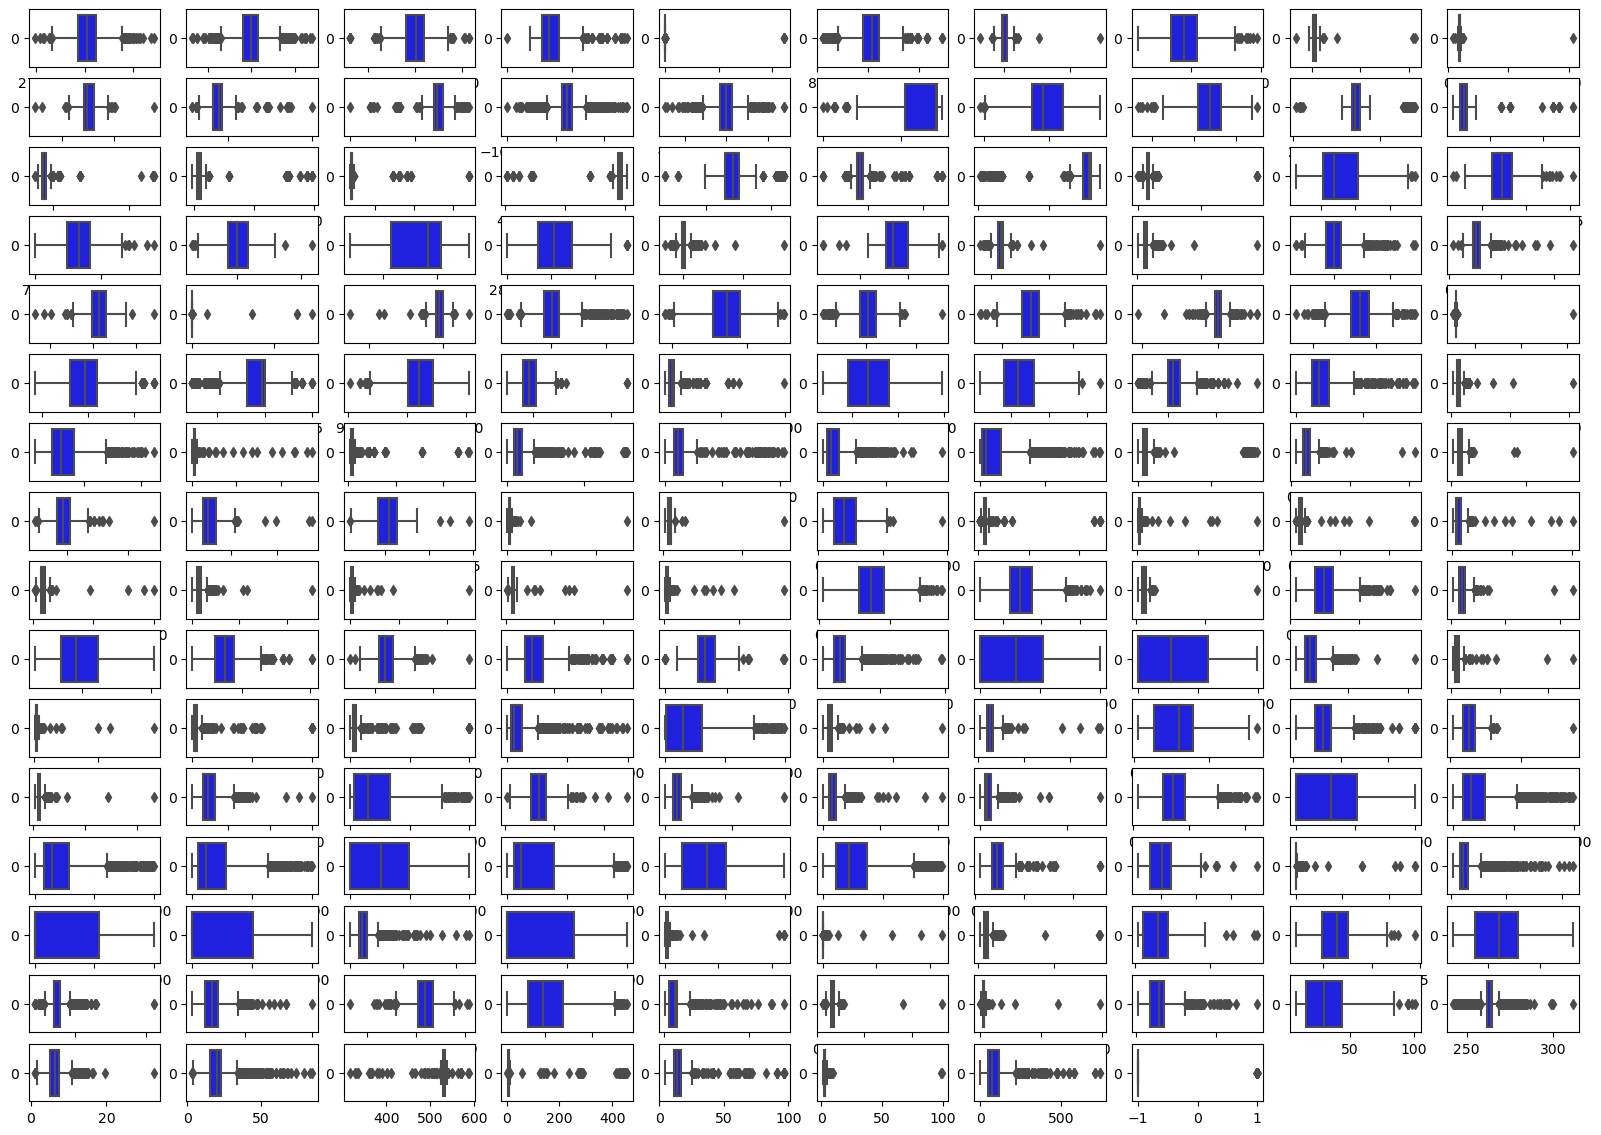

In [35]:
plt.figure(figsize=(20, 50))
col = 1
for i in signal_new.columns:
    plt.subplot(56,10, col)
    sns.boxplot(signal_new[i],color='blue',orient='h')
    col += 1

##### Observations:
<li> We can observe that there are outliers in majority of the features</li>
<li> considering the volume of the outliers treating the outliers could cause information loss</li>

### 3.B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

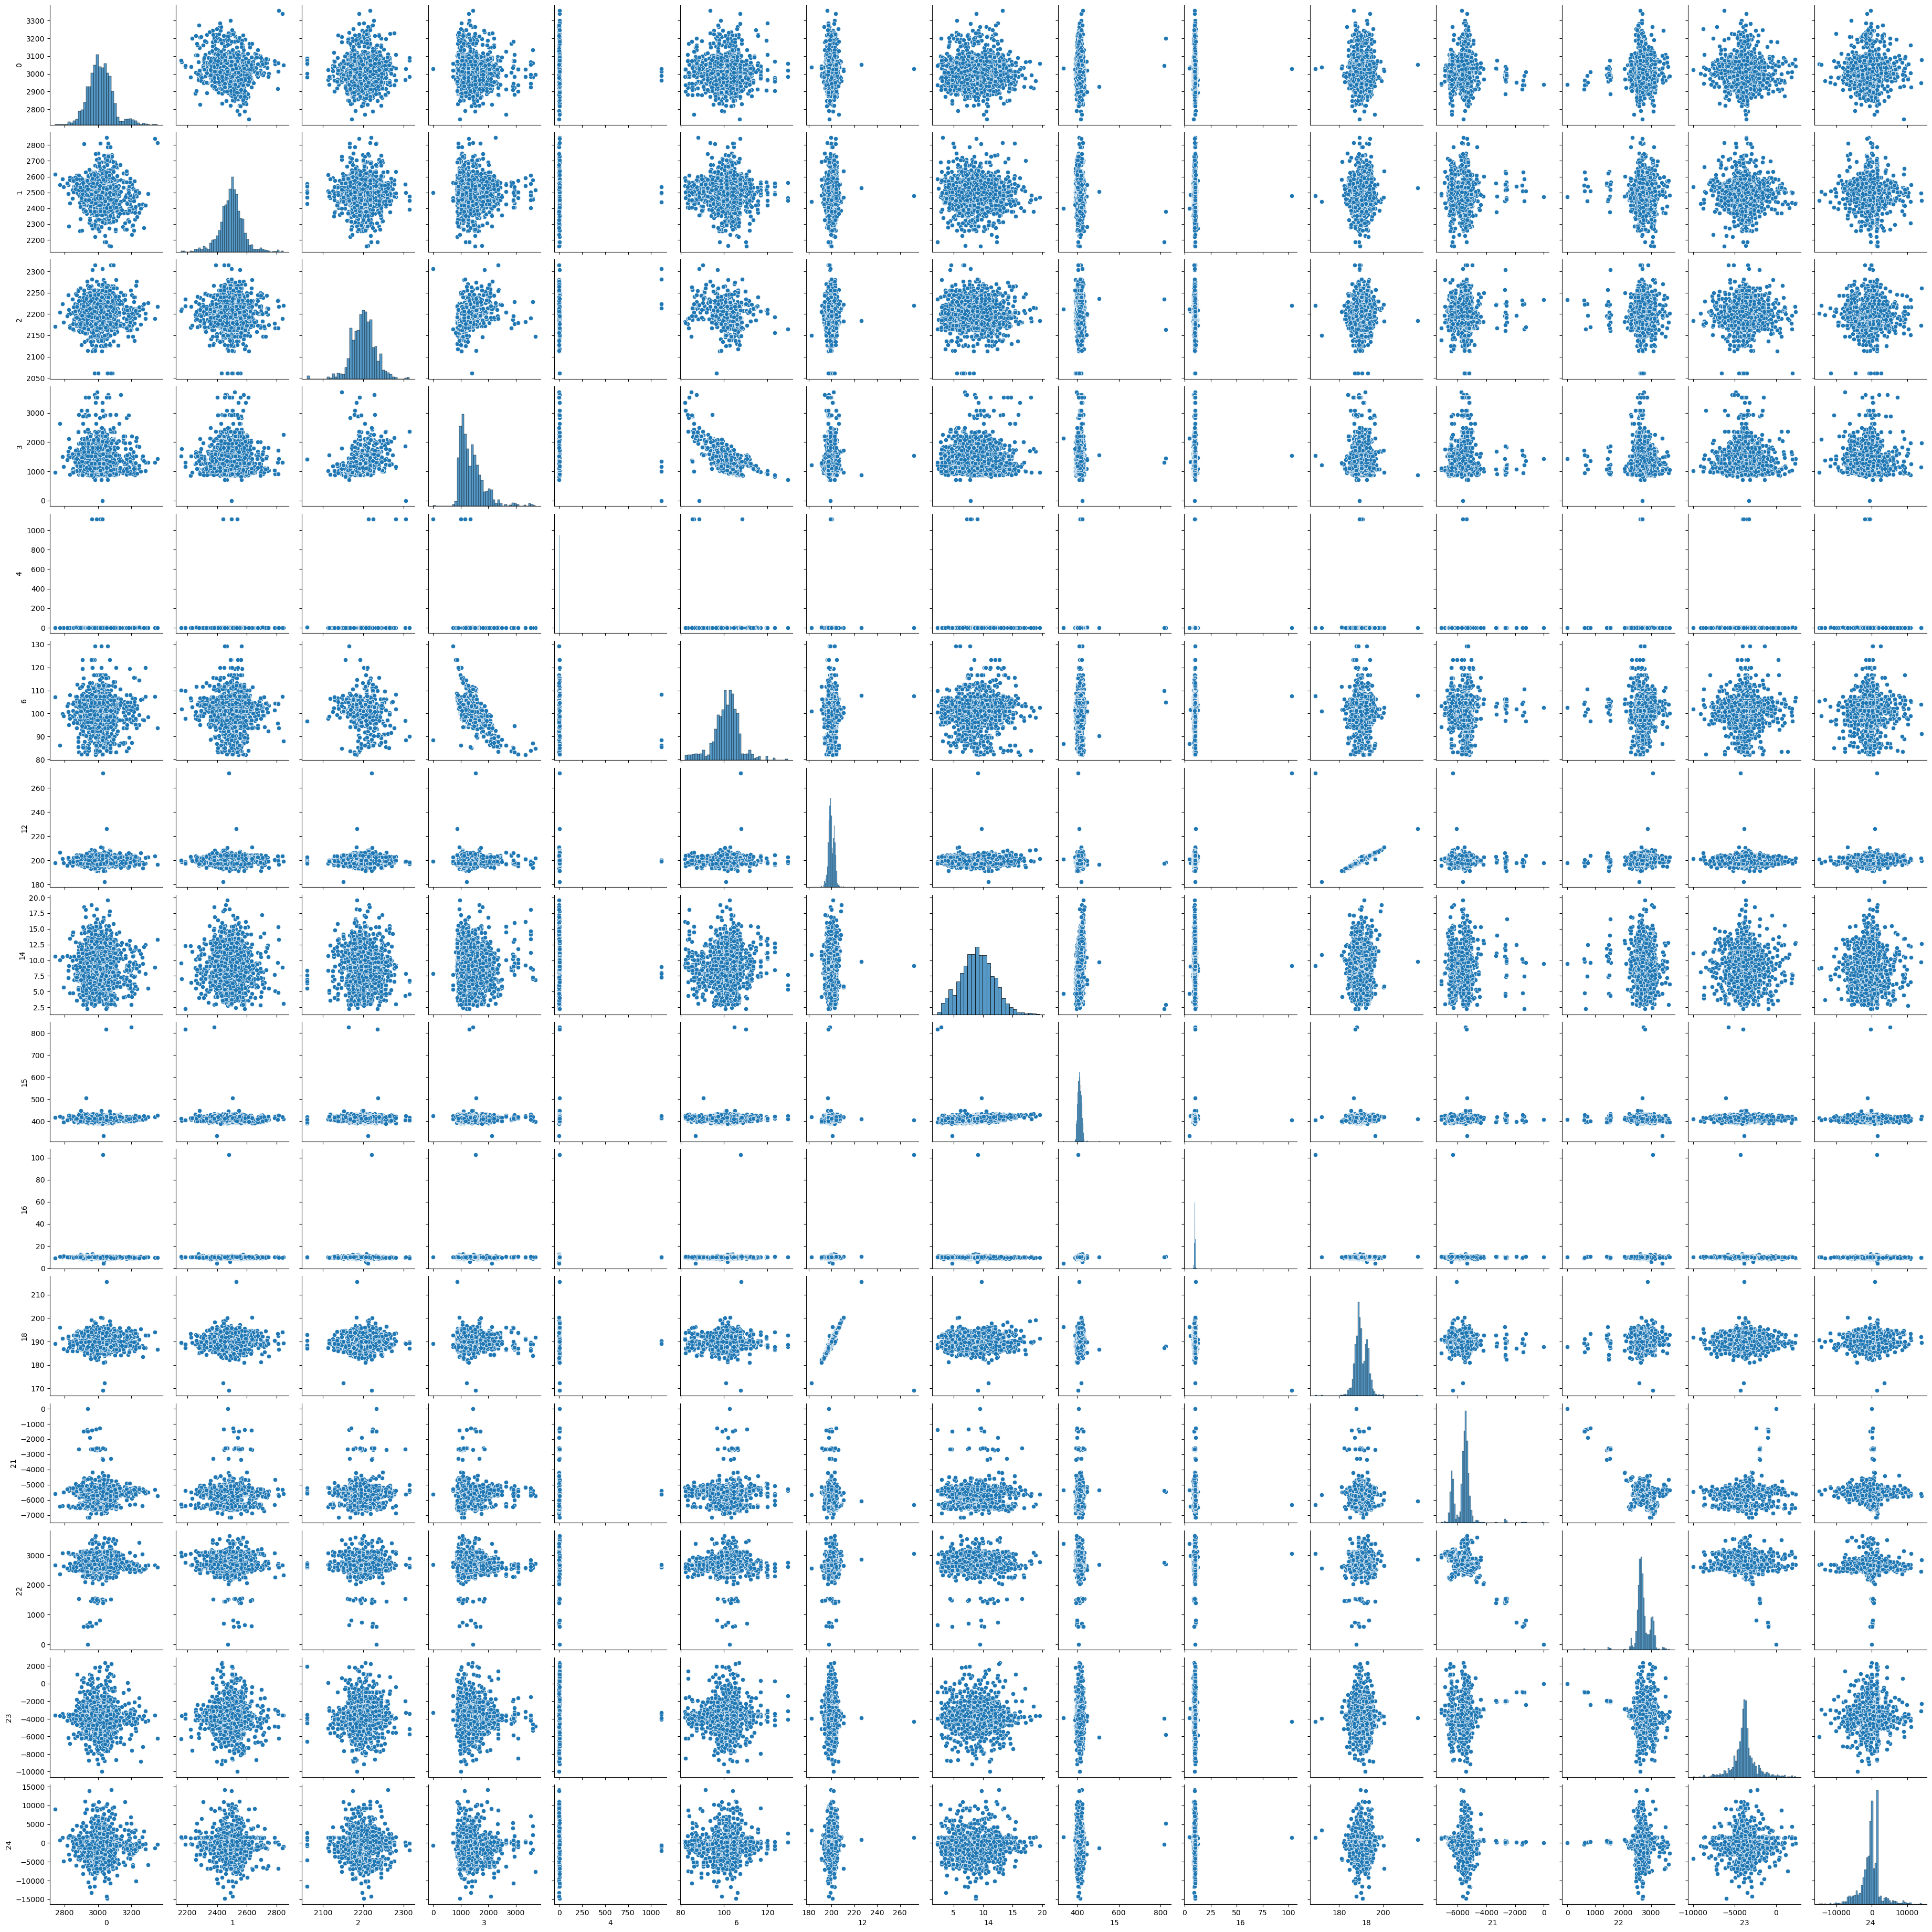

In [36]:
sns.pairplot(signal_new.iloc[:,0:15]);

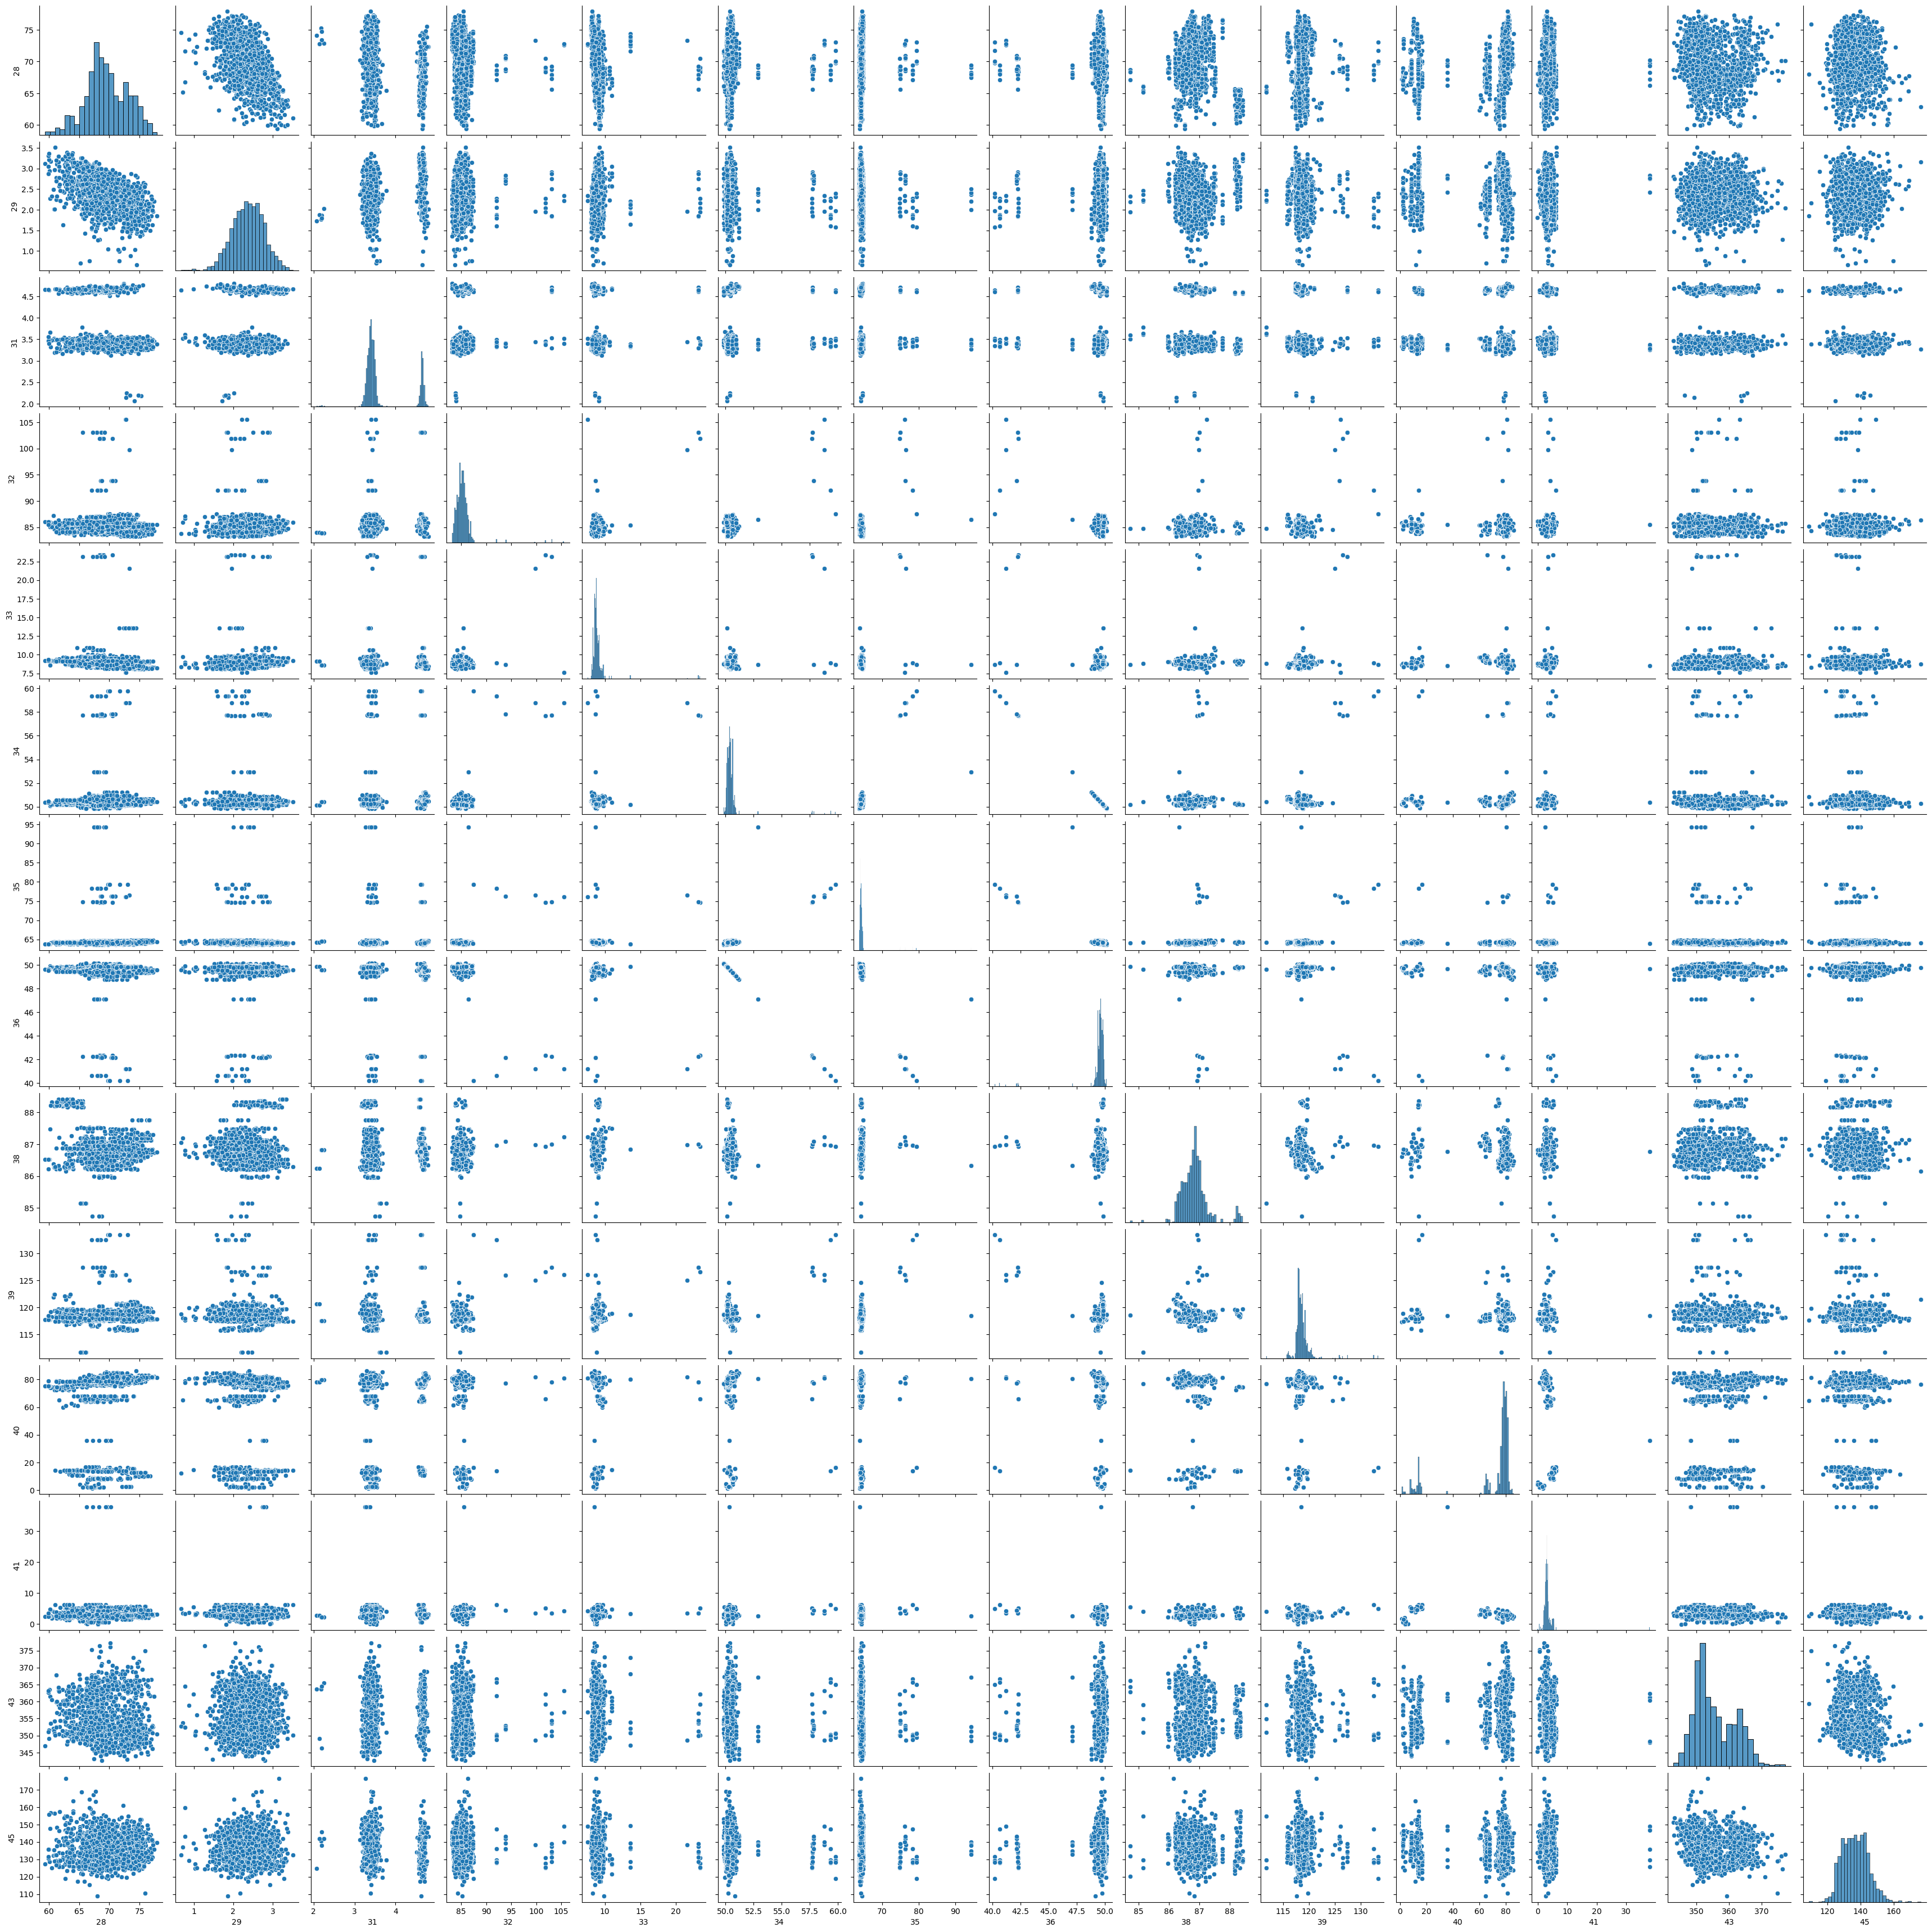

In [37]:
sns.pairplot(signal_new.iloc[:,16:30]);

Text(0.5, 1.0, 'Correlation heatmap for the Data')

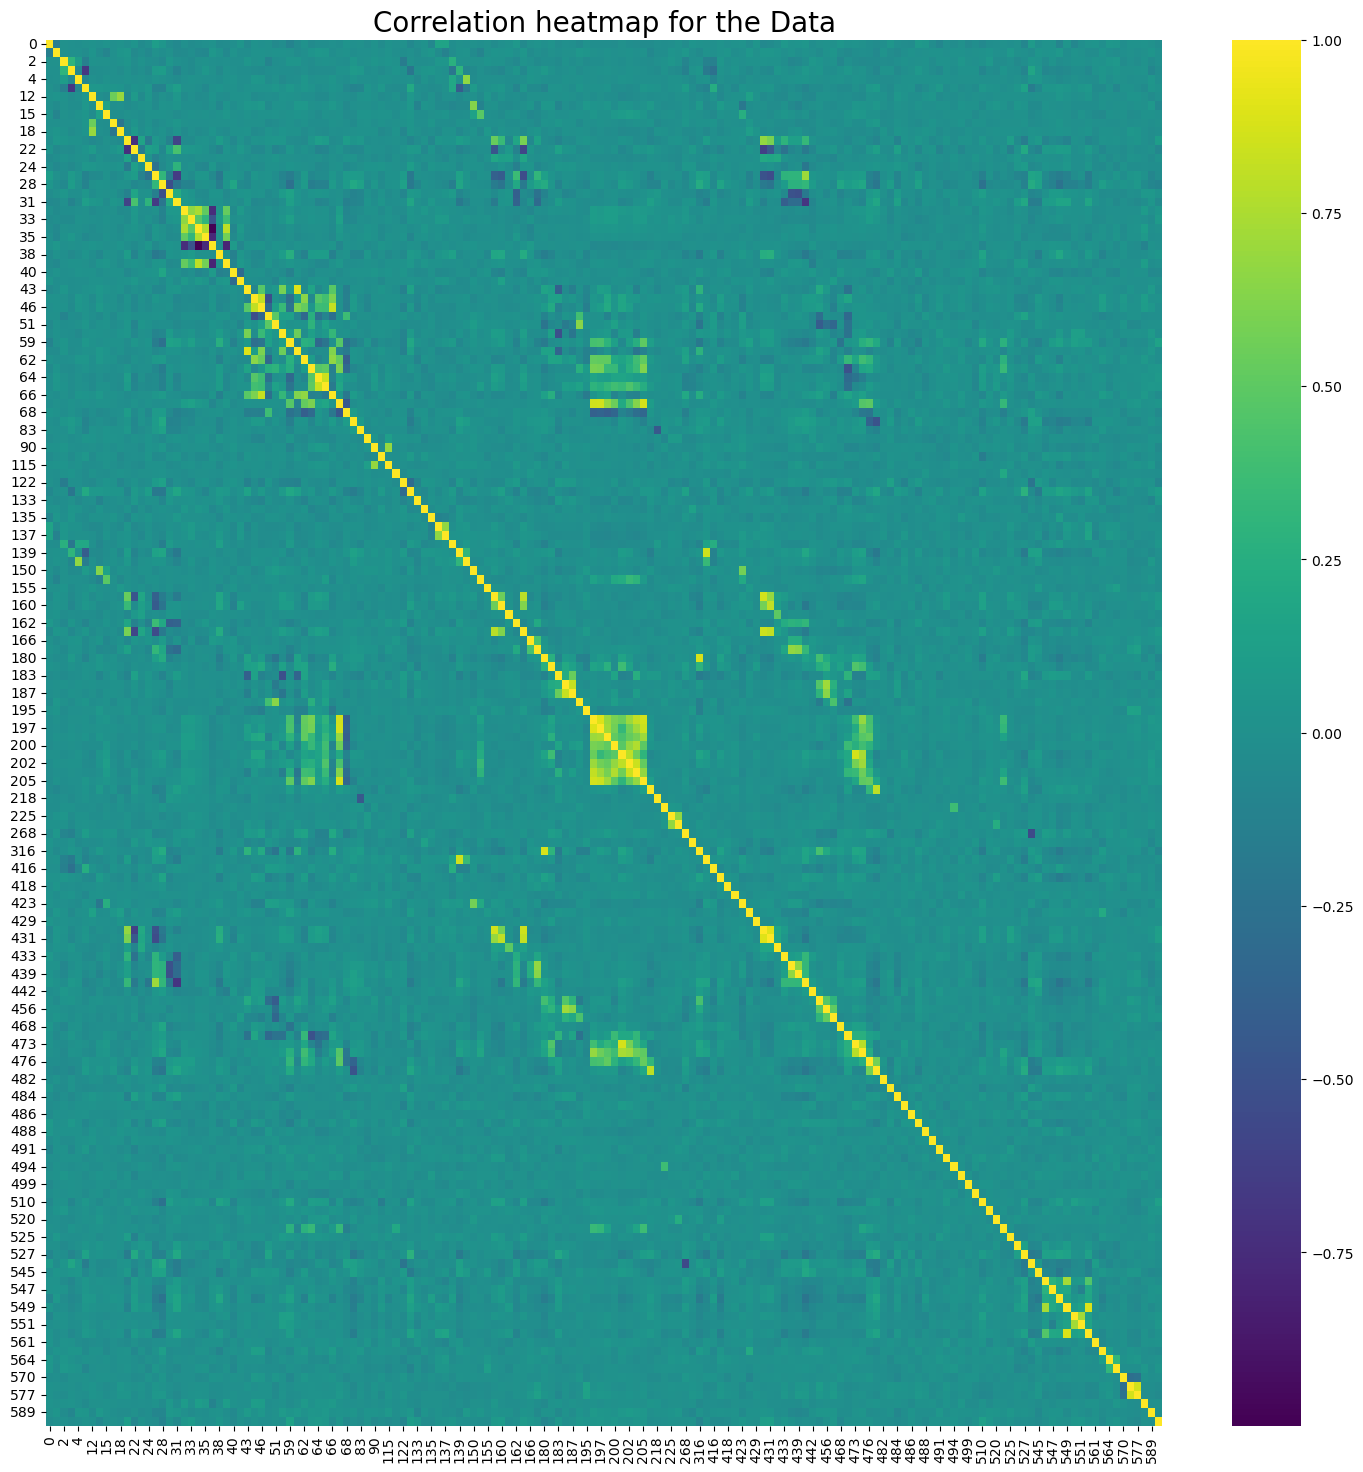

In [38]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(signal_new.corr(), cmap = "viridis")
plt.title('Correlation heatmap for the Data', fontsize = 20)

#### Observations
**multivariate analysis :**
<li>As we can observe from the above dist plot and the heat map, the data in majority of the features have minimum corelation.</li>
<li>Although some of the columns are still either positively or negetively corelated. This can be handled using PCA.</li>
  

### 4. Data pre-processing

#### 4.A. Segregate predictors vs target attributes.

In [39]:
signal_new.columns

Index(['0', '1', '2', '3', '4', '6', '12', '14', '15', '16',
       ...
       '561', '562', '564', '569', '570', '572', '577', '585', '589',
       'Pass/Fail'],
      dtype='object', length=158)

In [40]:
X = signal_new.drop('Pass/Fail', axis=1)
y = signal_new['Pass/Fail']

In [41]:
X.head()

0        1          2          3       4         6        12  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   

        14        15       16  ...       555      561         562       564  \
0   7.9558  414.8710  10.0433  ...   39.8842  42.3877  262.729683  6.444985   
1  10.1548  414.7347   9.2599  ...   53.1836  18.1087  262.729683  6.444985   
2   9.5157  416.7075   9.3144  ...   23.0713  24.7524  267.064000  1.100000   
3   9.6052  422.2894   9.6924  ...  161.4081  62.7572  268.228000  7.320000   
4  10.5661  420.5925  10.3387  ...   70.9706  22.0500  262.729683  6.444985   

         569       570    572      577      585         589  
0  21.117674  533.8500   8.95  14.9509   2.3630   99.670066  
1  21.117674  535.0164   5.92  10.9003   4.4447  208.204500  
2  68.848900  535.0245  11.21   9.2721   3.1745   82.860200  
3  25.036300  530.5682   9.33   8.5831   2.0544   73.843200  
4  21.117674  532.0155   8.83  10.9698  99.3032   73.843200  

[5 rows x 157 columns]

In [42]:
y.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: Pass/Fail, dtype: int64

#### 4.B. Check for target balancing and fix it if found imbalanced. 

In [43]:
y.value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

##### Observation:

<li>Target feature is highly imbalanced where "-1" representing "Pass" having 93.3% and "Fail" having 6.6%</li>
<li>In this case since the the failure rate is less than 10% it can be concluded that we can go ahead with oversampling to avoid any information loss</li>

In [44]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_os, y_os= smote.fit_resample(X, y)

In [45]:
print(X.shape)
print(y.shape)
print(X_os.shape)
print(y_os.shape)

(1567, 157)
(1567,)
(2926, 157)
(2926,)


In [46]:
y_os.value_counts() 

-1    1463
 1    1463
Name: Pass/Fail, dtype: int64

##### Observation:

<li>The target feature has been perfectly balanced using SMOTE(Synthetic Minority Oversampling Technique)</li>

#### 4.C. Perform train-test split and standardise the data or vice versa if required.

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.25, stratify = y_os, random_state=101)

In [48]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2194, 157)
x_test shape (732, 157)
y_train shape (2194,)
y_test shape (732,)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
col=X.columns

In [51]:
x_train

array([[-0.14529223, -0.65771275,  0.64506089, ..., -0.56907992,
        -0.1944015 ,  0.52811401],
       [-1.62119751,  0.3236986 , -1.34099509, ..., -0.67282274,
        -0.87604016,  1.24647417],
       [ 0.50428457, -1.11702265,  0.11176889, ..., -0.06269127,
        -0.94149319, -0.86634674],
       ...,
       [ 0.08698154,  0.53864555,  0.65602362, ..., -0.33184925,
        -0.98685128, -1.20044503],
       [-0.14228397,  2.84989909, -0.85809845, ...,  0.63067931,
        -0.44228299,  2.01506081],
       [ 1.14568173,  0.6517258 , -2.3284581 , ...,  0.43199958,
        -1.00011731, -0.47705725]])

In [52]:
x_test

array([[ 0.32398039, -0.35310065,  0.27792146, ..., -0.13705271,
         0.86628221, -0.76533208],
       [-0.07458028,  0.1648313 ,  0.79132291, ..., -0.26216665,
        -0.86950732, -0.4269443 ],
       [-1.72660119,  0.36235153,  1.94870764, ..., -0.22734821,
         0.09258193, -0.72931933],
       ...,
       [-0.53128696,  0.44024197,  1.3160396 , ...,  0.12547964,
         1.03094982, -0.70503283],
       [ 0.43179597, -0.64932608,  1.69539635, ..., -0.22910387,
        -0.87155394,  0.18346181],
       [-0.13388346, -0.52787645,  0.42006061, ..., -0.26634893,
        -0.23064968,  0.10536855]])

#### 4.D. Check if the train and test data have similar statistical characteristics when compared with original data.

#### Observation:
<li>Test and Train data have similar statistical charecteristics with original data</li>

### 5. Model training, testing and tuning

#### 5.A. Use any Supervised Learning technique to train a model

In [53]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=101)
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer

In [54]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=101)

In [55]:
print("Train score",dTree.score(x_train,y_train))
print("Test score",dTree.score(x_test,y_test))

Train score 1.0
Test score 0.8797814207650273


#### 5.B. Use cross validation techniques. 
Hint: Use all CV techniques that you have learnt in the course.

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold, cross_val_score

In [57]:
parameters = {'max_depth': range(1, 20),'criterion': ['gini', 'entropy'],'min_samples_leaf':range(2, 10)}
scorer = make_scorer(fbeta_score, beta=0.5)


**Using Gridsearch CV for decison tree**

In [58]:
dt_classifier= GridSearchCV(dTree,param_grid=parameters,scoring=scorer)
grid_fit = dt_classifier.fit(x_train, y_train)

In [59]:
best_clf = grid_fit.best_estimator_

In [60]:
best_predictions = best_clf.predict(x_test)

In [61]:
dt_gs_result=pd.DataFrame(grid_fit.cv_results_)

In [62]:
dt_gs_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.023294      0.004027         0.000929        0.000824   
1         0.025248      0.005607         0.000000        0.000000   
2         0.021961      0.007750         0.000000        0.000000   
3         0.021959      0.009410         0.003125        0.006249   
4         0.025113      0.007746         0.000000        0.000000   
..             ...           ...              ...             ...   
299       0.217685      0.023812         0.000000        0.000000   
300       0.212908      0.019606         0.000000        0.000000   
301       0.210777      0.020718         0.000000        0.000000   
302       0.210576      0.021159         0.000000        0.000000   
303       0.207728      0.017968         0.000000        0.000000   

    param_criterion param_max_depth param_min_samples_leaf  \
0              gini               1                      2   
1              gini               1                      3   
2              gini               1                      4   
3              gini               1                      5   
4              gini               1                      6   
..              ...             ...                    ...   
299         entropy              19                      5   
300         entropy              19                      6   
301         entropy              19                      7   
302         entropy              19                      8   
303         entropy              19                      9   

                                                params  split0_test_score  \
0    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.663943   
1    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.663943   
2    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.663943   
3    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.663943   
4    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.663943   
..                                                 ...                ...   
299  {'criterion': 'entropy', 'max_depth': 19, 'min...           0.847688   
300  {'criterion': 'entropy', 'max_depth': 19, 'min...           0.851819   
301  {'criterion': 'entropy', 'max_depth': 19, 'min...           0.829675   
302  {'criterion': 'entropy', 'max_depth': 19, 'min...           0.823256   
303  {'criterion': 'entropy', 'max_depth': 19, 'min...           0.821791   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.737148           0.723982           0.708175   
1             0.737148           0.723982           0.708175   
2             0.737148           0.723982           0.708175   
3             0.737148           0.723982           0.708175   
4             0.737148           0.723982           0.708175   
..                 ...                ...                ...   
299           0.845557           0.859899           0.829038   
300           0.817694           0.866725           0.836268   
301           0.808758           0.852076           0.817474   
302           0.814581           0.847751           0.812500   
303           0.811044           0.831926           0.830292   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.678060         0.702262        0.027488              289  
1             0.678060         0.702262        0.027488              289  
2             0.678060         0.702262        0.027488              289  
3             0.678060         0.702262        0.027488              289  
4             0.678060         0.702262        0.027488              289  
..                 ...              ...             ...              ...  
299           0.876242         0.851685        0.015729               52  
300           0.847534         0.844008        0.016382               86  
301           0.840259         0.829648        0.015493       

In [63]:
dt_gs_result[['param_criterion','param_max_depth','params','mean_test_score','rank_test_score']]

param_criterion param_max_depth  \
0              gini               1   
1              gini               1   
2              gini               1   
3              gini               1   
4              gini               1   
..              ...             ...   
299         entropy              19   
300         entropy              19   
301         entropy              19   
302         entropy              19   
303         entropy              19   

                                                params  mean_test_score  \
0    {'criterion': 'gini', 'max_depth': 1, 'min_sam...         0.702262   
1    {'criterion': 'gini', 'max_depth': 1, 'min_sam...         0.702262   
2    {'criterion': 'gini', 'max_depth': 1, 'min_sam...         0.702262   
3    {'criterion': 'gini', 'max_depth': 1, 'min_sam...         0.702262   
4    {'criterion': 'gini', 'max_depth': 1, 'min_sam...         0.702262   
..                                                 ...              ...   
299  {'criterion': 'entropy', 'max_depth': 19, 'min...         0.851685   
300  {'criterion': 'entropy', 'max_depth': 19, 'min...         0.844008   
301  {'criterion': 'entropy', 'max_depth': 19, 'min...         0.829648   
302  {'criterion': 'entropy', 'max_depth': 19, 'min...         0.826439   
303  {'criterion': 'entropy', 'max_depth': 19, 'min...         0.827094   

     rank_test_score  
0                289  
1                289  
2                289  
3                289  
4                289  
..               ...  
299               52  
300               86  
301              147  
302              178  
303              168  

[304 rows x 5 columns]

In [64]:
# Evaluate the optimized model
print("Optimized Model:")
print("Best parameters:", grid_fit.best_params_)
print("Final accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))

Optimized Model:
Best parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 2}
Final accuracy score on testing data: 0.8743
Final F-score on testing data: 0.8649


**Using RandomizedSearchCV for decison tree**

In [65]:
dt_classifier= RandomizedSearchCV(dTree,param_distributions=parameters,scoring=scorer)
random_fit = dt_classifier.fit(x_train, y_train)

In [66]:
dt_Rs_result=pd.DataFrame(random_fit.cv_results_)

In [67]:
dt_Rs_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.190554      0.015333         0.003526        0.006100   
1       0.219806      0.013554         0.000000        0.000000   
2       0.044263      0.006368         0.000000        0.000000   
3       0.161549      0.007537         0.000000        0.000000   
4       0.179896      0.018663         0.005418        0.006644   
5       0.160784      0.014280         0.000000        0.000000   
6       0.233045      0.034323         0.002803        0.005606   
7       0.041059      0.008720         0.000000        0.000000   
8       0.217011      0.015517         0.000000        0.000000   
9       0.097550      0.006238         0.000000        0.000000   

  param_min_samples_leaf param_max_depth param_criterion  \
0                      3              19            gini   
1                      3              11         entropy   
2                      7               2            gini   
3                      5              11            gini   
4                      4              19            gini   
5                      7              13            gini   
6                      2              17         entropy   
7                      5               2            gini   
8                      5              18         entropy   
9                      5               5            gini   

                                              params  split0_test_score  \
0  {'min_samples_leaf': 3, 'max_depth': 19, 'crit...           0.831075   
1  {'min_samples_leaf': 3, 'max_depth': 11, 'crit...           0.839895   
2  {'min_samples_leaf': 7, 'max_depth': 2, 'crite...           0.742138   
3  {'min_samples_leaf': 5, 'max_depth': 11, 'crit...           0.802357   
4  {'min_samples_leaf': 4, 'max_depth': 19, 'crit...           0.818438   
5  {'min_samples_leaf': 7, 'max_depth': 13, 'crit...           0.784225   
6  {'min_samples_leaf': 2, 'max_depth': 17, 'crit...           0.860692   
7  {'min_samples_leaf': 5, 'max_depth': 2, 'crite...           0.742138   
8  {'min_samples_leaf': 5, 'max_depth': 18, 'crit...           0.847688   
9  {'min_samples_leaf': 5, 'max_depth': 5, 'crite...           0.763828   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.873154           0.834760           0.867347           0.887764   
1           0.828500           0.845960           0.830565           0.881057   
2           0.737483           0.715241           0.763221           0.728430   
3           0.871314           0.820578           0.852473           0.873965   
4           0.875811           0.836364           0.866725           0.875357   
5           0.849492           0.812274           0.840444           0.847382   
6           0.852614           0.850340           0.827815           0.885276   
7           0.737483           0.715241           0.763221           0.728430   
8           0.845557           0.859899           0.829038           0.876242   
9           0.847234           0.805085           0.791536           0.802161   

   mean_test_score  std_test_score  rank_test_score  
0         0.858820        0.022202                1  
1         0.845195        0.019013                5  
2         0.737303        0.015879                9  
3         0.844138        0.028278                6  
4         0.854539        0.023100                3  
5         0.826763        0.025093                7  
6         0.855347        0.018520                2  
7         0.737303        0.015879                9  
8         0.851685        0.015729                4  
9         0.801969        0.026916                8

In [68]:
dt_Rs_result[['param_max_depth','params','params','rank_test_score','mean_test_score']]

param_max_depth                                             params  \
0              19  {'min_samples_leaf': 3, 'max_depth': 19, 'crit...   
1              11  {'min_samples_leaf': 3, 'max_depth': 11, 'crit...   
2               2  {'min_samples_leaf': 7, 'max_depth': 2, 'crite...   
3              11  {'min_samples_leaf': 5, 'max_depth': 11, 'crit...   
4              19  {'min_samples_leaf': 4, 'max_depth': 19, 'crit...   
5              13  {'min_samples_leaf': 7, 'max_depth': 13, 'crit...   
6              17  {'min_samples_leaf': 2, 'max_depth': 17, 'crit...   
7               2  {'min_samples_leaf': 5, 'max_depth': 2, 'crite...   
8              18  {'min_samples_leaf': 5, 'max_depth': 18, 'crit...   
9               5  {'min_samples_leaf': 5, 'max_depth': 5, 'crite...   

                                              params  rank_test_score  \
0  {'min_samples_leaf': 3, 'max_depth': 19, 'crit...                1   
1  {'min_samples_leaf': 3, 'max_depth': 11, 'crit...                5   
2  {'min_samples_leaf': 7, 'max_depth': 2, 'crite...                9   
3  {'min_samples_leaf': 5, 'max_depth': 11, 'crit...                6   
4  {'min_samples_leaf': 4, 'max_depth': 19, 'crit...                3   
5  {'min_samples_leaf': 7, 'max_depth': 13, 'crit...                7   
6  {'min_samples_leaf': 2, 'max_depth': 17, 'crit...                2   
7  {'min_samples_leaf': 5, 'max_depth': 2, 'crite...                9   
8  {'min_samples_leaf': 5, 'max_depth': 18, 'crit...                4   
9  {'min_samples_leaf': 5, 'max_depth': 5, 'crite...                8   

   mean_test_score  
0         0.858820  
1         0.845195  
2         0.737303  
3         0.844138  
4         0.854539  
5         0.826763  
6         0.855347  
7         0.737303  
8         0.851685  
9         0.801969

In [69]:
print(random_fit.best_estimator_)
print('\n')
print(random_fit.get_params)
print('\n')
print(random_fit.best_score_)

DecisionTreeClassifier(max_depth=19, min_samples_leaf=3, random_state=101)


<bound method BaseEstimator.get_params of RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(2, 10)},
                   scoring=make_scorer(fbeta_score, beta=0.5))>


0.858820091781461


#### 5.C. Apply hyper-parameter tuning techniques to get the best accuracy.
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 


**Using the Parameters from the Gridserach CV. Below are the best parameters mentioned"**
<li> criterion': 'gini'</li> 
<li> max_depth': 19 </li>
<li> min_samples_leaf': 2</li>


In [70]:
from sklearn.tree import DecisionTreeClassifier
dTree_Gs_bP = DecisionTreeClassifier(criterion = 'gini', max_depth=19,min_samples_leaf=2)

In [71]:
dTree_Gs_bP.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=19, min_samples_leaf=2)

In [72]:
print("Train score",dTree_Gs_bP.score(x_train,y_train))
print("Test score",dTree_Gs_bP.score(x_test,y_test))

Train score 0.9908842297174111
Test score 0.8702185792349727


**Using the Parameters from the Randomisedsearch CV. Below are the best parameters mentioned"**
<li> criterion': 'gini'</li> 
<li> max_depth': 11 </li>
<li> min_samples_leaf': 5</li>
<li>random_state=101</li>


In [73]:
dTree_rs_bP = DecisionTreeClassifier(criterion = 'gini', max_depth=11,min_samples_leaf=5,random_state=101)

In [74]:
dTree_rs_bP.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, random_state=101)

In [75]:
print("Train score",dTree_rs_bP.score(x_train,y_train))
print("Test score",dTree_rs_bP.score(x_test,y_test))

Train score 0.9685505925250684
Test score 0.8592896174863388


#### Observation:
<li> From the above we can conclude that best parameters determined using Gridsearch CV results in best model with 88% accurecy on the test data</li>

#### 5.D. Use any other technique/method which can enhance the model performance.
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

In [76]:
from sklearn.decomposition import PCA
pca=PCA()

In [77]:
pca.fit(x_train)

PCA()

In [78]:
print("\nPercentage of variation explained by each eigen Vector\n",pca.explained_variance_ratio_)
print("\n Cumulative Variance Explained\n",np.cumsum(pca.explained_variance_ratio_))


Percentage of variation explained by each eigen Vector
 [6.11427533e-02 5.47323240e-02 3.72684688e-02 3.41549409e-02
 2.93779944e-02 2.60567719e-02 2.31273499e-02 2.09534246e-02
 1.92905770e-02 1.77060911e-02 1.63519053e-02 1.60139245e-02
 1.53352485e-02 1.52376893e-02 1.48552854e-02 1.47570501e-02
 1.41876979e-02 1.36688074e-02 1.34899460e-02 1.30907104e-02
 1.25244629e-02 1.18818901e-02 1.13981361e-02 1.11311322e-02
 1.09433411e-02 1.07765798e-02 1.05494680e-02 1.02908850e-02
 1.00312947e-02 9.98417348e-03 9.62885657e-03 9.45975021e-03
 9.34281143e-03 8.92632873e-03 8.61157630e-03 8.49134486e-03
 8.33887815e-03 8.22624946e-03 7.97175369e-03 7.91111745e-03
 7.68768467e-03 7.49103933e-03 7.41748502e-03 7.14674882e-03
 7.13024133e-03 6.98082591e-03 6.81926957e-03 6.68853940e-03
 6.59767380e-03 6.47299742e-03 6.24119294e-03 6.16529170e-03
 6.06738497e-03 5.93388565e-03 5.81132423e-03 5.75017364e-03
 5.67451062e-03 5.63036151e-03 5.55294881e-03 5.48101990e-03
 5.37705062e-03 5.34321760e-

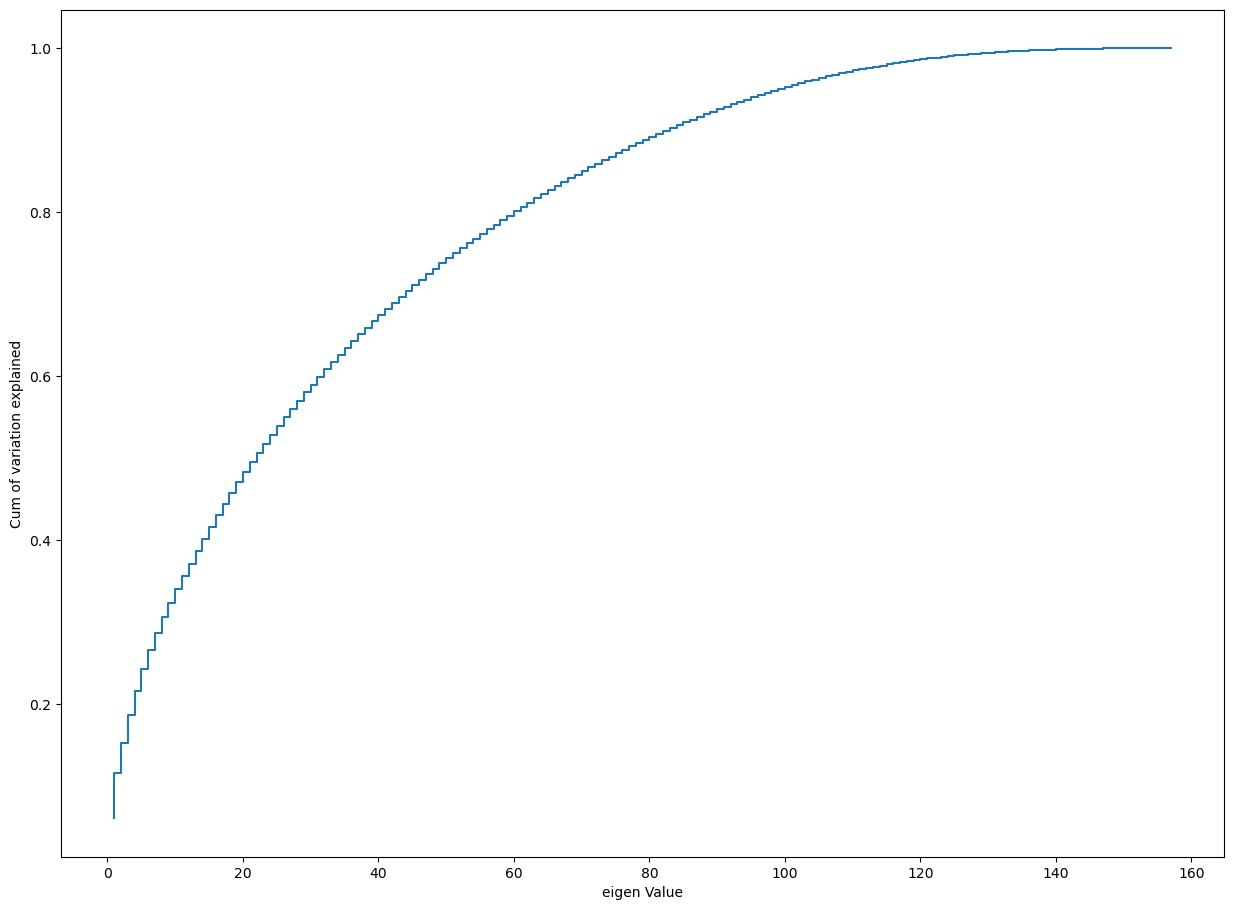

In [79]:
'PLOT - CUMULATIVE VARIATON EXPLAINED vs EIGEN VALUE'
cum_val=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15,11));
plt.step(range(1,158),cum_val);
plt.ylabel('Cum of variation explained');
plt.xlabel('eigen Value');
plt.show();

In [80]:
pca=PCA(n_components=120)
pca.fit(x_train)

PCA(n_components=120)

In [81]:
x_trainp=pca.transform(x_train)
x_testp=pca.transform(x_test)

In [82]:
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[1,2,3,4,5,6]}
grid = GridSearchCV(dTree, param_grid,cv=10)
%time grid.fit(x_trainp, y_train)
print(grid.best_params_)
dTreebest = grid.best_estimator_
y_predict_Grid = dTreebest.predict(x_testp)

CPU times: total: 6min
Wall time: 20min 27s
{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 1}


In [83]:
print(dTreebest.score(x_trainp,y_train))
print(dTreebest.score(x_testp,y_test))

0.9794895168641751
0.8743169398907104


#### Observation:

We have reduced the no. of dimensions from 157 to 120. Here, the performance of the model has improved from 88% to 91%.

#### 5.E. Display and explain the classification report in detail.

In [84]:
from sklearn.metrics import  classification_report

print(classification_report(y_test, y_predict_Grid, digits=2))

              precision    recall  f1-score   support

          -1       0.92      0.82      0.87       366
           1       0.84      0.93      0.88       366

    accuracy                           0.87       732
   macro avg       0.88      0.87      0.87       732
weighted avg       0.88      0.87      0.87       732



In [85]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
Accu_score=accuracy_score(y_test,y_predict_Grid)*100
recall=(recall_score(y_test,y_predict_Grid)*100)
precision=(precision_score(y_test,y_predict_Grid)*100)
f1score=f1_score(y_test,y_predict_Grid)*100

In [86]:
print("Accuracy of Decision Tree is %0.3f"%Accu_score)
print("Misclassification Rate of Decision Tree Model is %0.3f"%(100- Accu_score))
print("F1-Score of Decision Tree is %0.3f"%f1score)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision)

Accuracy of Decision Tree is 87.432
Misclassification Rate of Decision Tree Model is 12.568
F1-Score of Decision Tree is 88.052
Recall( =TP/(TP+FN)) is 92.623 
Precision( =TP/(TP+FP)) is 83.911


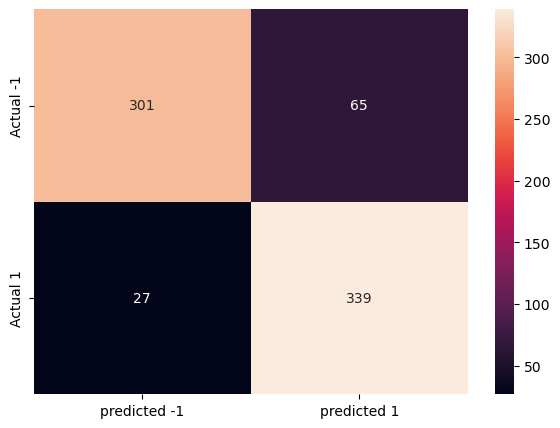

In [87]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_predict_Grid)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['Actual -1', 'Actual 1'],
                           columns=['predicted -1', 'predicted 1',])
plt.figure(figsize = (7,5))
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

In [88]:
resultsDf=pd.DataFrame()
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'],'Train Accuracy': dTreebest.score(x_trainp,y_train),'Test Accuracy': Accu_score,'Recall':recall,'Precision':precision,'F1-Score':f1score})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

Method  Train Accuracy  Test Accuracy     Recall  Precision  \
0  Decision Tree         0.97949      87.431694  92.622951  83.910891   

    F1-Score  
0  88.051948

**We have a recall and Precion value of greater than 94% which represents that the model is highly accurate**

#### 5.F. Apply the above steps for all possible models that you have learnt so far. 

##### Model 2 - Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [90]:
lr.fit(x_trainp,y_train)
y_pred=lr.predict(x_testp)

In [91]:
print("Logistical regresiion Train score:",lr.score(x_trainp,y_train))
print("Logistical regresiion Test score:",lr.score(x_testp,y_test))

Logistical regresiion Train score: 0.8751139471285324
Logistical regresiion Test score: 0.8237704918032787


In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=77,shuffle=True)
results = cross_val_score(lr,X, y, cv=kfold,)
print(results)
print(np.mean(abs(results)))
print(results.std())

[0.95541401 0.92993631 0.9044586  0.92356688 0.94904459 0.95541401
 0.91719745 0.90384615 0.90384615 0.96153846]
0.9304262616364527
0.022074878838925303


In [93]:
Accu_score2=accuracy_score(y_test,y_pred)*100
recall2=(recall_score(y_test,y_pred)*100)
precision2=(precision_score(y_test,y_pred)*100)
f1score2=(f1_score(y_test,y_pred)*100)

In [94]:
print("Accuracy of Logistic Regression Model is %0.3f"%Accu_score2)
print("Misclassification Rate of Logistic Regression Model is %0.3f"%(100- Accu_score2))
print("F!-score of Logistic Regression Model is %0.3f"%f1score2)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall2)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision2)

Accuracy of Logistic Regression Model is 82.377
Misclassification Rate of Logistic Regression Model is 17.623
F!-score of Logistic Regression Model is 83.004
Recall( =TP/(TP+FN)) is 86.066 
Precision( =TP/(TP+FP)) is 80.153


In [95]:
print('CLASSIFICATION REPORT FOR LOGISTIC REGRESSION')
print(classification_report(y_test, y_pred, digits=2))

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION
              precision    recall  f1-score   support

          -1       0.85      0.79      0.82       366
           1       0.80      0.86      0.83       366

    accuracy                           0.82       732
   macro avg       0.83      0.82      0.82       732
weighted avg       0.83      0.82      0.82       732



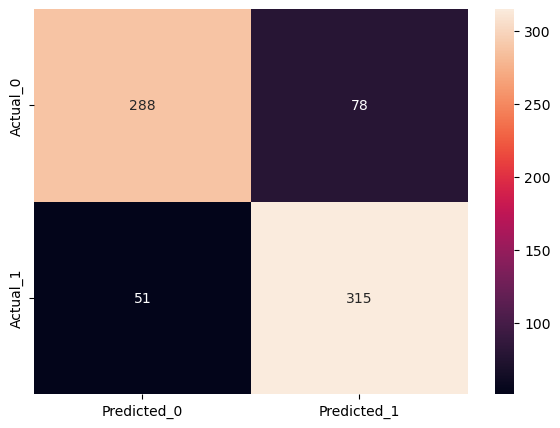

In [96]:
cm=confusion_matrix(y_test, y_pred)

dcm=pd.DataFrame(cm,index=['Actual_0', 'Actual_1'],columns=['Predicted_0', 'Predicted_1',])
plt.figure(figsize = (7,5))
sns.heatmap(dcm,annot=True,fmt='.9g');

In [97]:
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'],'Train Accuracy': lr.score(x_trainp,y_train),'Test Accuracy': Accu_score2,'Recall':recall2,'Precision':precision2,'F1-Score':f1score2})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

Method  Train Accuracy  Test Accuracy     Recall  Precision  \
0        Decision Tree        0.979490      87.431694  92.622951  83.910891   
1  Logistic Regression        0.875114      82.377049  86.065574  80.152672   

    F1-Score  
0  88.051948  
1  83.003953

**Model 3 - KNN**

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [99]:
param_grid = {'n_neighbors': [3,5,7,9,11,13,19,21,23,25,27,29],
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(knn, param_grid,cv=10) 
%time grid.fit(x_trainp, y_train)
print(grid.best_params_)
Kbest = grid.best_estimator_
y_predict_Grid = Kbest.predict(x_testp)

CPU times: total: 1min 5s
Wall time: 11.7 s
{'metric': 'euclidean', 'n_neighbors': 3}


In [100]:
print("KNN Train score:",Kbest.score(x_trainp,y_train))
print("KNN Test score:",Kbest.score(x_testp,y_test))

KNN Train score: 0.7752962625341842
KNN Test score: 0.6680327868852459


In [101]:
Accu_score3=accuracy_score(y_test,y_predict_Grid)*100
recall3=(recall_score(y_test,y_predict_Grid)*100)
precision3=(precision_score(y_test,y_predict_Grid)*100)
f1score3=f1_score(y_test,y_predict_Grid)*100

print("Accuracy of KNN is %0.3f"%Accu_score3)
print("Misclassification Rate of KNN Model is %0.3f"%(100- Accu_score3))
print("F1-Score of KNN is %0.3f"%f1score3)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall3)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision3)

Accuracy of KNN is 66.803
Misclassification Rate of KNN Model is 33.197
F1-Score of KNN is 75.077
Recall( =TP/(TP+FN)) is 100.000 
Precision( =TP/(TP+FP)) is 60.099


In [102]:
print('CLASSIFICATION REPORT FOR KNN')
print(classification_report(y_test, y_predict_Grid, digits=2))

CLASSIFICATION REPORT FOR KNN
              precision    recall  f1-score   support

          -1       1.00      0.34      0.50       366
           1       0.60      1.00      0.75       366

    accuracy                           0.67       732
   macro avg       0.80      0.67      0.63       732
weighted avg       0.80      0.67      0.63       732



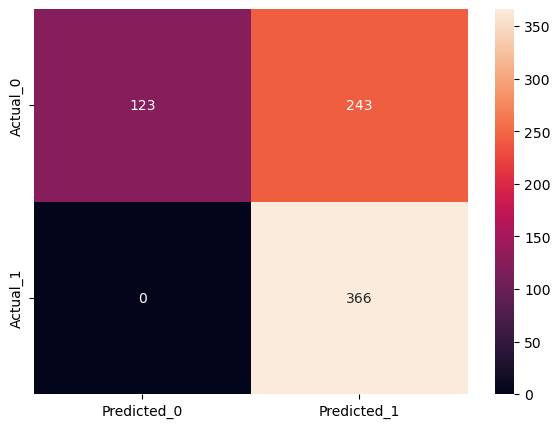

In [103]:
cm=confusion_matrix(y_test, y_predict_Grid)
dcm=pd.DataFrame(cm,index=['Actual_0', 'Actual_1'],columns=['Predicted_0', 'Predicted_1',])
plt.figure(figsize = (7,5))
sns.heatmap(dcm,annot=True,fmt='.9g');


In [104]:
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'Train Accuracy': '0.93','Test Accuracy': Accu_score3,'Recall':recall3,'Precision':precision3,'F1-Score':f1score3})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

Method Train Accuracy  Test Accuracy      Recall  Precision  \
0        Decision Tree        0.97949      87.431694   92.622951  83.910891   
1  Logistic Regression       0.875114      82.377049   86.065574  80.152672   
2                  KNN           0.93      66.803279  100.000000  60.098522   

    F1-Score  
0  88.051948  
1  83.003953  
2  75.076923

**Model 4 - SVM**

In [105]:
from sklearn.svm import SVC
svm=SVC()

In [106]:
param_grid={ 'C':[0.1,1,10,100],
            'gamma':[0.01,0.1,1,10],
            'kernel':['rbf','poly']
}
grid=GridSearchCV(svm,param_grid,cv=10)  
grid.fit(x_trainp,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'poly']})

In [107]:
print(grid.best_params_)
SVMbest=grid.best_estimator_
SVMbest
y_predict_grid=SVMbest.predict(x_testp)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [108]:
print("SVM Train score:",SVMbest.score(x_trainp, y_train))
print("SVM Test score:",SVMbest.score(x_testp, y_test))

SVM Train score: 1.0
SVM Test score: 0.9959016393442623


In [109]:
print(classification_report(y_test, y_predict_grid, digits=2))

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       366
           1       0.99      1.00      1.00       366

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



In [110]:
Accu_score4=accuracy_score(y_test,y_predict_grid)*100
recall4=(recall_score(y_test,y_predict_grid)*100)
precision4=(precision_score(y_test,y_predict_grid)*100)
f1score4=f1_score(y_test,y_predict_grid)*100

print("Accuracy of SVM is %0.3f"%Accu_score4)
print("Misclassification Rate of SVM Model is %0.3f"%(100- Accu_score4))
print("F1-Score of SVM is %0.3f"%f1score4)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall4)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision4)

Accuracy of SVM is 99.590
Misclassification Rate of SVM Model is 0.410
F1-Score of SVM is 99.592
Recall( =TP/(TP+FN)) is 100.000 
Precision( =TP/(TP+FP)) is 99.187


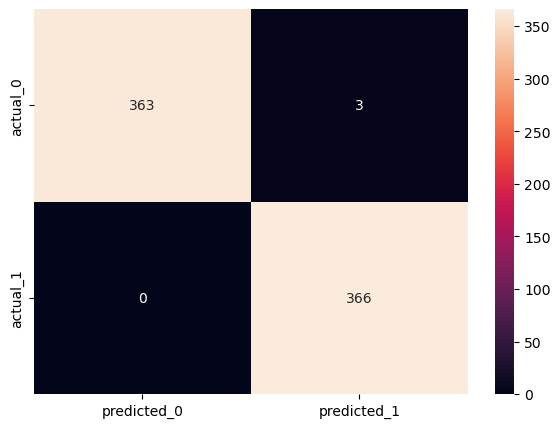

In [111]:
conf_mat = confusion_matrix(y_test, y_predict_grid)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['actual_0', 'actual_1'],
                           columns=['predicted_0', 'predicted_1',])
plt.figure(figsize = (7,5))
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

In [112]:
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Train Accuracy': '1.0','Test Accuracy': Accu_score4,'Recall':recall4,'Precision':precision4,'F1-Score':f1score4})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

Method Train Accuracy  Test Accuracy      Recall  Precision  \
0        Decision Tree        0.97949      87.431694   92.622951  83.910891   
1  Logistic Regression       0.875114      82.377049   86.065574  80.152672   
2                  KNN           0.93      66.803279  100.000000  60.098522   
3                  SVM            1.0      99.590164  100.000000  99.186992   

    F1-Score  
0  88.051948  
1  83.003953  
2  75.076923  
3  99.591837

**Model 5 - Random Forest Classifier**

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc = RandomForestClassifier(n_estimators = 50, random_state=12)
rfc = rfc.fit(x_trainp, y_train)

y_predict = rfc.predict(x_testp)

In [115]:
print("Random forest Train score:",rfc.score(x_trainp , y_train))
print("Random forest Test score:",rfc.score(x_testp , y_test))

Random forest Train score: 1.0
Random forest Test score: 0.9795081967213115


In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=77,shuffle=True)
results = cross_val_score(rfc,X, y, cv=kfold)


In [117]:
print(results)

print(np.mean(abs(results)))
print(results.std())

[0.96178344 0.92993631 0.91719745 0.92356688 0.95541401 0.94904459
 0.91719745 0.90384615 0.91025641 0.96153846]
0.9329781153029562
0.020899212281438314


In [118]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
Accu_score5=accuracy_score(y_test,y_predict)*100
recall5=(recall_score(y_test,y_predict)*100)
precision5=(precision_score(y_test,y_predict)*100)
f1score5=f1_score(y_test,y_predict)*100

print("Accuracy of Random Forest Classifier  is %0.3f"%Accu_score5)
print("Misclassification Rate of Random Forest Classifier Model is %0.3f"%(100- Accu_score5))
print("F1-Score of SVM is %0.3f"%f1score5)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall5)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision5)

Accuracy of Random Forest Classifier  is 97.951
Misclassification Rate of Random Forest Classifier Model is 2.049
F1-Score of SVM is 97.914
Recall( =TP/(TP+FN)) is 96.175 
Precision( =TP/(TP+FP)) is 99.717


In [119]:
confusion_matrix(y_test, y_predict)

array([[365,   1],
       [ 14, 352]], dtype=int64)

<Axes: >

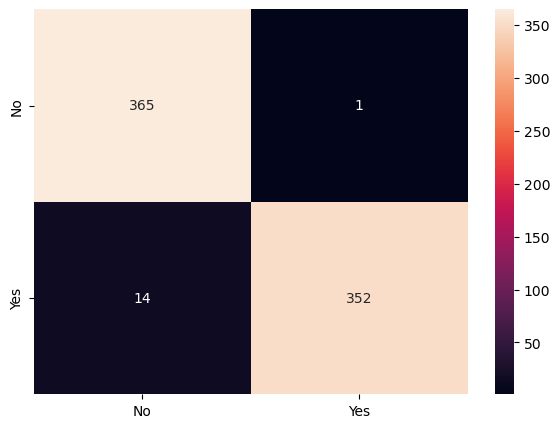

In [120]:
cm=confusion_matrix(y_test, y_predict,labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [121]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Classifier'], 'Train Accuracy': '1.0','Test Accuracy': Accu_score5,'Recall':recall5,'Precision':precision5,'F1-Score':f1score5})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

Method Train Accuracy  Test Accuracy      Recall  \
0             Decision Tree        0.97949      87.431694   92.622951   
1       Logistic Regression       0.875114      82.377049   86.065574   
2                       KNN           0.93      66.803279  100.000000   
3                       SVM            1.0      99.590164  100.000000   
4  Random Forest Classifier            1.0      97.950820   96.174863   

   Precision   F1-Score  
0  83.910891  88.051948  
1  80.152672  83.003953  
2  60.098522  75.076923  
3  99.186992  99.591837  
4  99.716714  97.913769

**Model 6: Adaboost Classifier**

In [122]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=40, random_state=1)

abc = abc.fit(x_trainp, y_train)

In [123]:
y_predict = abc.predict(x_testp)

In [124]:
print("Adaboost Train score:",abc.score(x_trainp , y_train))
print("Adaboost Test score:",abc.score(x_testp , y_test))

Adaboost Train score: 0.96718322698268
Adaboost Test score: 0.9275956284153005


In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=77,shuffle=True)
results = cross_val_score(abc,X, y, cv=kfold)

In [126]:
print(results)
print(np.mean(abs(results)))
print(results.std())

[0.92356688 0.91082803 0.87261146 0.91719745 0.94904459 0.93630573
 0.92356688 0.88461538 0.91666667 0.92948718]
0.9163890249877511
0.021668779540414712


In [127]:
Accu_score6=accuracy_score(y_test,y_predict)*100
recall6=(recall_score(y_test,y_predict)*100)
precision6=(precision_score(y_test,y_predict)*100)
f1score6=f1_score(y_test,y_predict)*100

print("Accuracy of Adaboost Classifier  is %0.3f"%Accu_score6)
print("Misclassification Rate of Adaboost Classifier Model is %0.3f"%(100- Accu_score6))
print("F1-Score of SVM is %0.3f"%f1score6)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall6)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision6)

Accuracy of Adaboost Classifier  is 92.760
Misclassification Rate of Adaboost Classifier Model is 7.240
F1-Score of SVM is 92.587
Recall( =TP/(TP+FN)) is 90.437 
Precision( =TP/(TP+FP)) is 94.842


<Axes: >

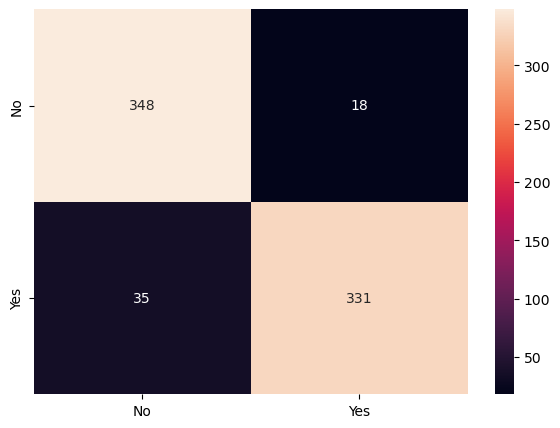

In [128]:
cm=confusion_matrix(y_test, y_predict,labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [129]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost Classifier'], 'Train Accuracy': '0.89','Test Accuracy': Accu_score6,'Recall':recall6,'Precision':precision6,'F1-Score':f1score6})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf

Method Train Accuracy  Test Accuracy      Recall  \
0             Decision Tree        0.97949      87.431694   92.622951   
1       Logistic Regression       0.875114      82.377049   86.065574   
2                       KNN           0.93      66.803279  100.000000   
3                       SVM            1.0      99.590164  100.000000   
4  Random Forest Classifier            1.0      97.950820   96.174863   
5       Adaboost Classifier           0.89      92.759563   90.437158   

   Precision   F1-Score  
0  83.910891  88.051948  
1  80.152672  83.003953  
2  60.098522  75.076923  
3  99.186992  99.591837  
4  99.716714  97.913769  
5  94.842407  92.587413

### 6. Post Training and Conclusion:

#### 6.A. Display and compare all the models designed with their train and test accuracies.

In [130]:
resultsDf

Method Train Accuracy  Test Accuracy      Recall  \
0             Decision Tree        0.97949      87.431694   92.622951   
1       Logistic Regression       0.875114      82.377049   86.065574   
2                       KNN           0.93      66.803279  100.000000   
3                       SVM            1.0      99.590164  100.000000   
4  Random Forest Classifier            1.0      97.950820   96.174863   
5       Adaboost Classifier           0.89      92.759563   90.437158   

   Precision   F1-Score  
0  83.910891  88.051948  
1  80.152672  83.003953  
2  60.098522  75.076923  
3  99.186992  99.591837  
4  99.716714  97.913769  
5  94.842407  92.587413

#### 6.B. Select the final best trained model along with your detailed comments for selecting this model.


##### Observations:
<li> from the above we can conclude that the train and test accuracy for both SVM and Random Forest is ~100%.</li>
<li> however when we look at the Reacall and Precision,Since the requirement here is to reduce type 2 error ie.those production entities which actually failed, but we predict them as pass, we need to focus more on the Recall value than the precion</li>
<li> Considering the above we can select SVM model as the best trained model with "100%" recall and having F1 score of 99.6 </li>


#### 6.C.Pickle the selected model for future use

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [132]:
pipeline = Pipeline([
                    ('scl', StandardScaler()), 
                    ('pca', PCA(n_components=120)),
                    ('clf', SVC(C=10, gamma= 0.1, kernel= 'rbf'))])

In [133]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=120)),
                ('clf', SVC(C=10, gamma=0.1))])

In [134]:
import pickle
saved_model = pickle.dumps(pipeline)

In [135]:
# load the model from disk
loaded_model = pickle.loads(saved_model)

#### 6.D. Write your conclusion on the results

#### Observation:

**<li> The Data set has around 592 features and suffers from the curse of dimesionality</li>**
**<li> The Original data has been treated for missing values,columns with only zero variance and low variance.</li>**
**<li> There were outliers in the data however was not treated since the same could have caused information loss</li>**
**<li> The target variable was highly imbalanced and was balanced using SMOT oversampling </li>**
**<li> PCA was used to reduce the dimentions of the data </li>**
**<li> Out of all the models built and trained SVM was the best trained model and had high recall, accuracy and F1 score </li>**

